In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default
----------------------------------------
Finished loading Cluster module
----------------------------------------


In [3]:
cases = [c for c in clusdata_all]
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [4]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [5]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[70, 70, 70, 70, 70]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[150, 150, 150, 150, 150]
272 272 272 12/31/19 12/31/19 12/31/19


In [6]:
# 61 countries on Sep 24 with mindeaths=200 and mindays=160
# note that changing the minimal common active epidemic time series length mindays from 160 to 150 included only 4 new countries on Sep 24
# decreasing minimal total death count from 200 to 100 included only 3 new countries on Sep 24 
# doing both included 7 new countries : 68 in total 
len(testing_x['dates'])

272

# ClusterFit testing

In [8]:
np.argsort(list(range(4,14)))[-1:][0]

9

16000 2 seats

In [9]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [10]:
[x for x in dir() if 'death' in x]

['deaths',
 'deaths_jhu',
 'deaths_owid',
 'deaths_raw',
 'mindeaths',
 'new_deaths_spm',
 'new_deaths_spm_x',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_x']

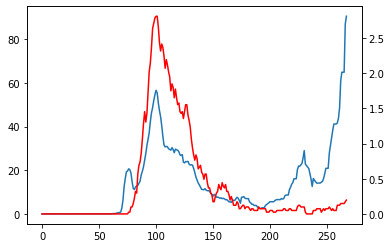

In [12]:
country = 'Denmark'
fig,ax = plt.subplots()
ax.plot(new_cases_spm[country])
axx = ax.twinx()
axx.plot(new_deaths_spm[country],color='red');


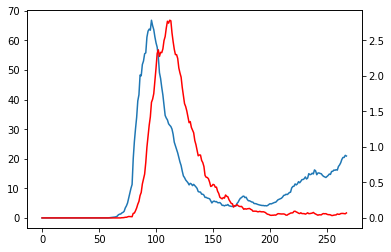

In [13]:
country = 'Germany'
fig,ax = plt.subplots()
ax.plot(new_cases_spm[country])
axx = ax.twinx()
axx.plot(new_deaths_spm[country],color='red');



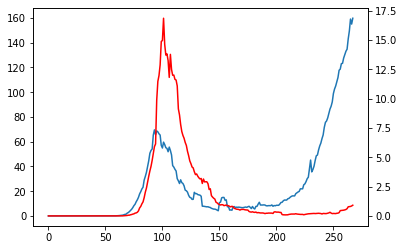

In [14]:
country = 'France'
fig,ax = plt.subplots()
ax.plot(new_cases_spm[country])
axx = ax.twinx()
axx.plot(new_deaths_spm[country],color='red');



In [24]:
def plot_all2(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        axes[row,col].plot(dat[country])
        axes[row,col].set_title(country)
        if adj is not None:
            ax = axes[row,col].twinx()
            ax.plot(adj[country],color='darkred',alpha=0.6)
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


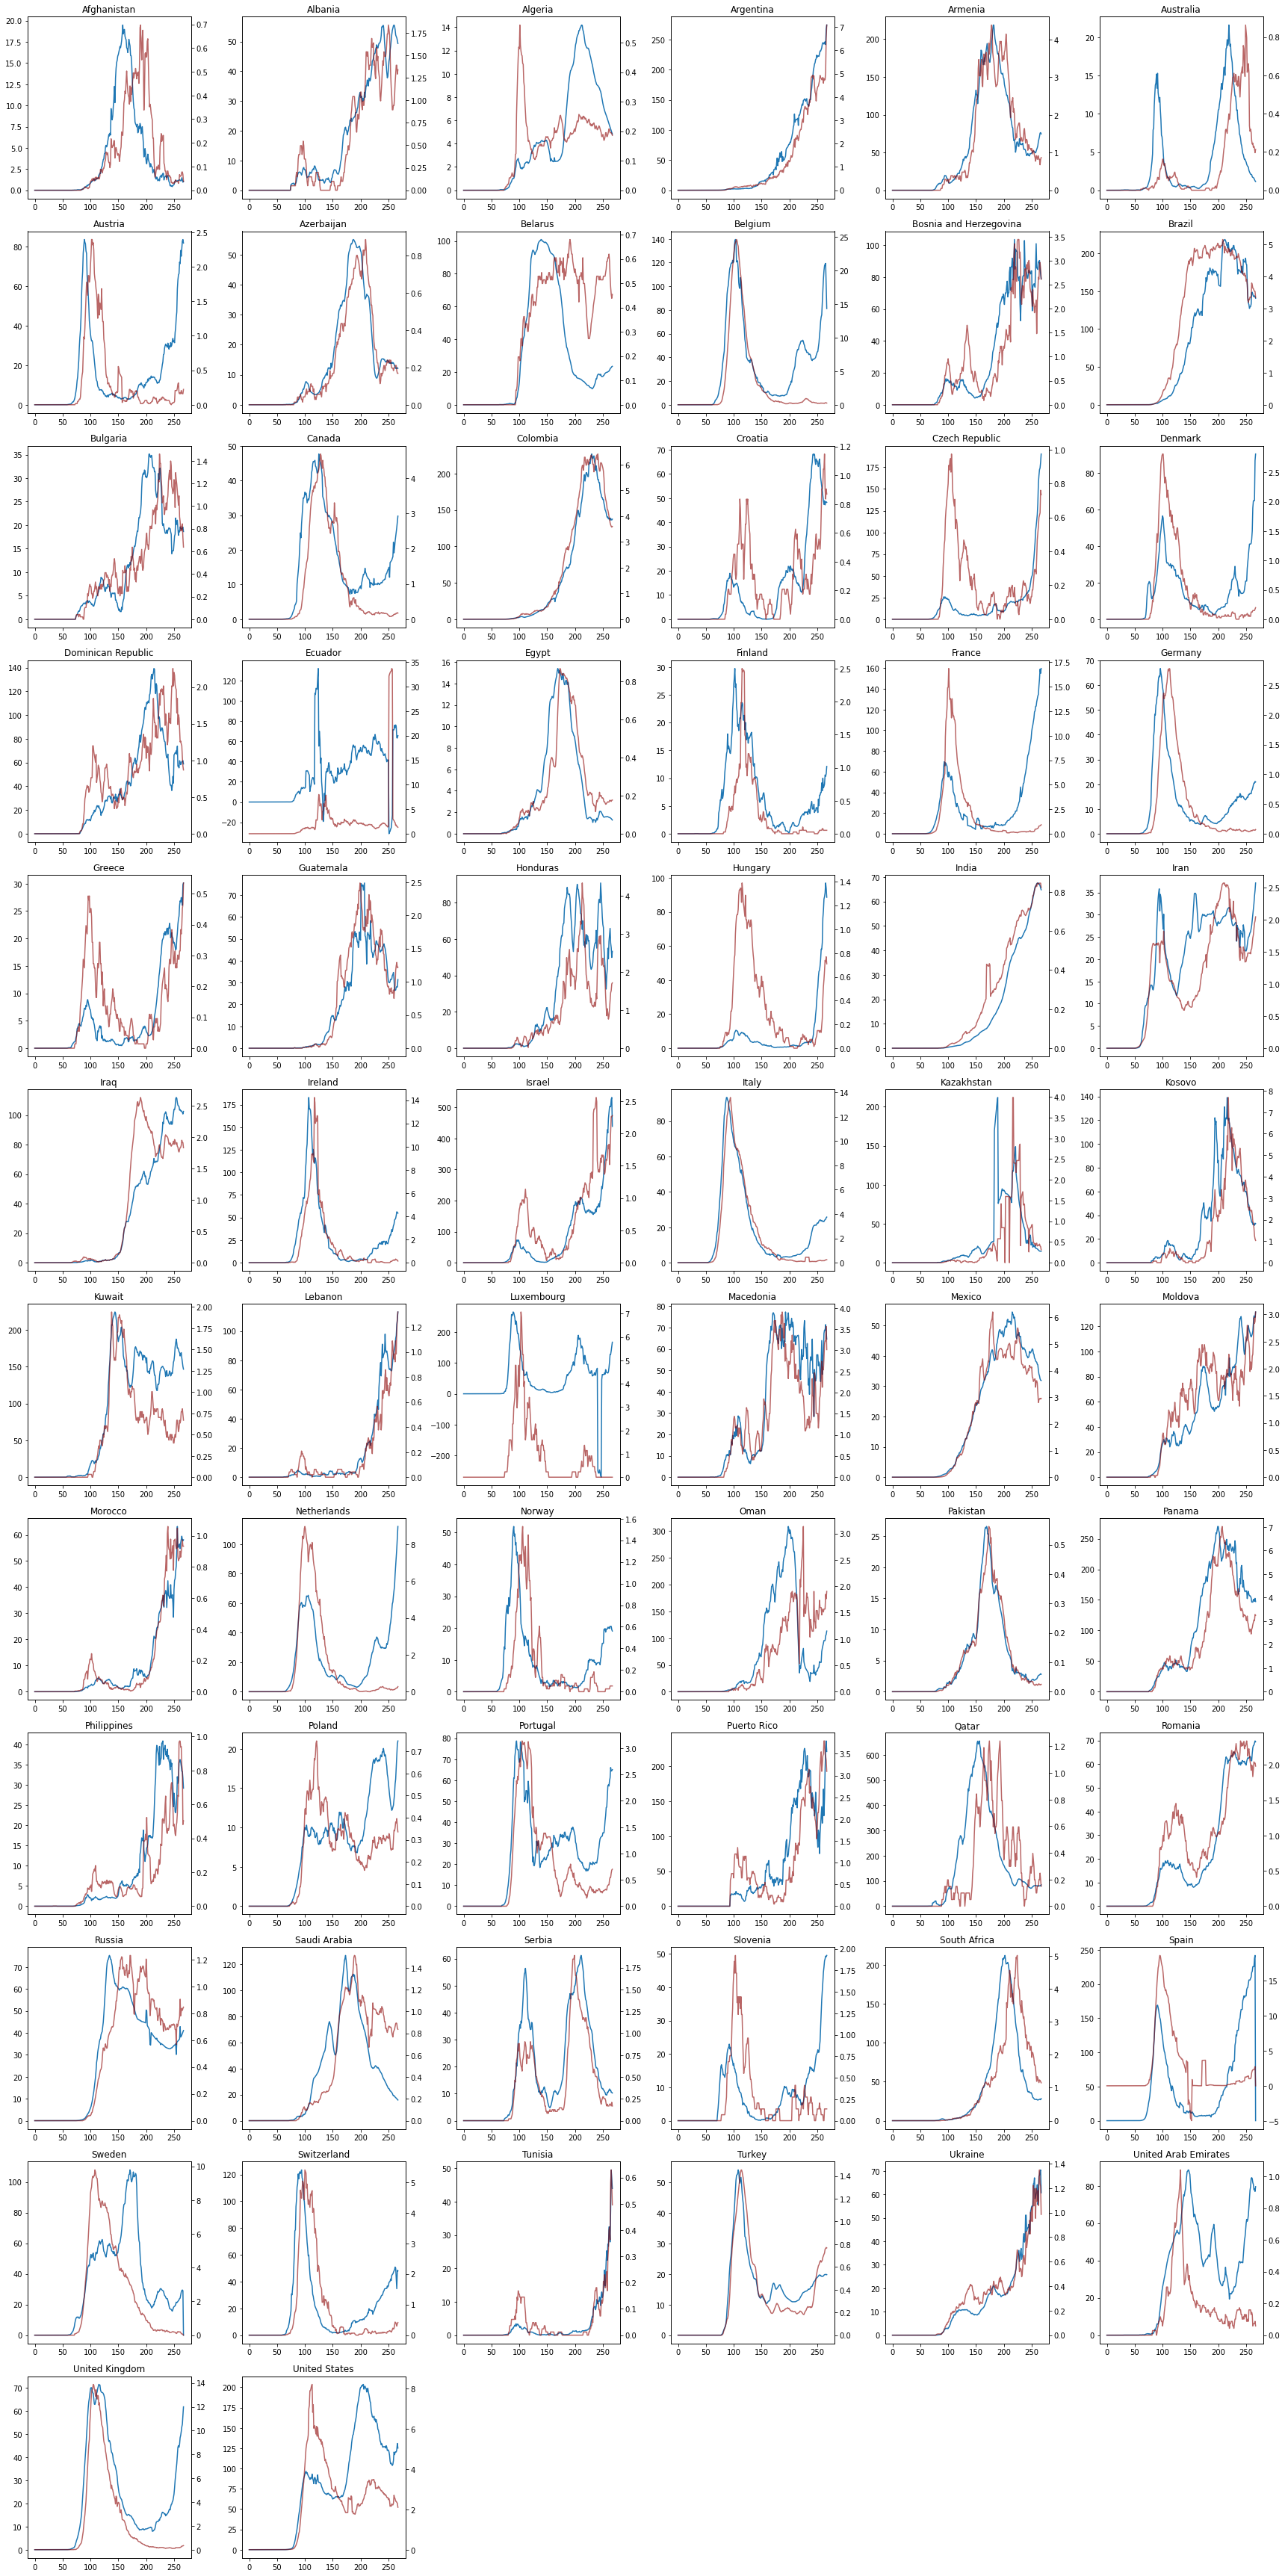

In [25]:
plot_all2(countries,new_cases_spm,new_deaths_spm)

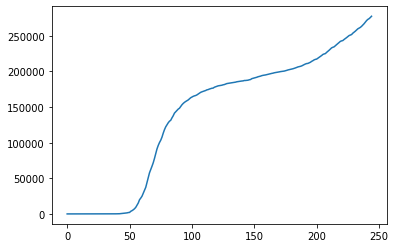

In [11]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [ ]:
len(clusdata_all['cases'])

In [ ]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [ ]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

In [ ]:
foo.clus_labels

In [ ]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

In [ ]:
np.lexsort((c_countries,foo.clus_labels))

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.clus_labels

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [ ]:
len(clusdata_all['cases'])

In [ ]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
np.mean(foofft.clus_probs)

In [ ]:
foofft.clus_labels

In [ ]:
foofft.cluster_plot_all()

In [ ]:
foofft.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [ ]:
len(clusdata_all['deaths'])

In [ ]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

In [ ]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [ ]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [ ]:
foofft.umap_cluster(3) # arg = random seed

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

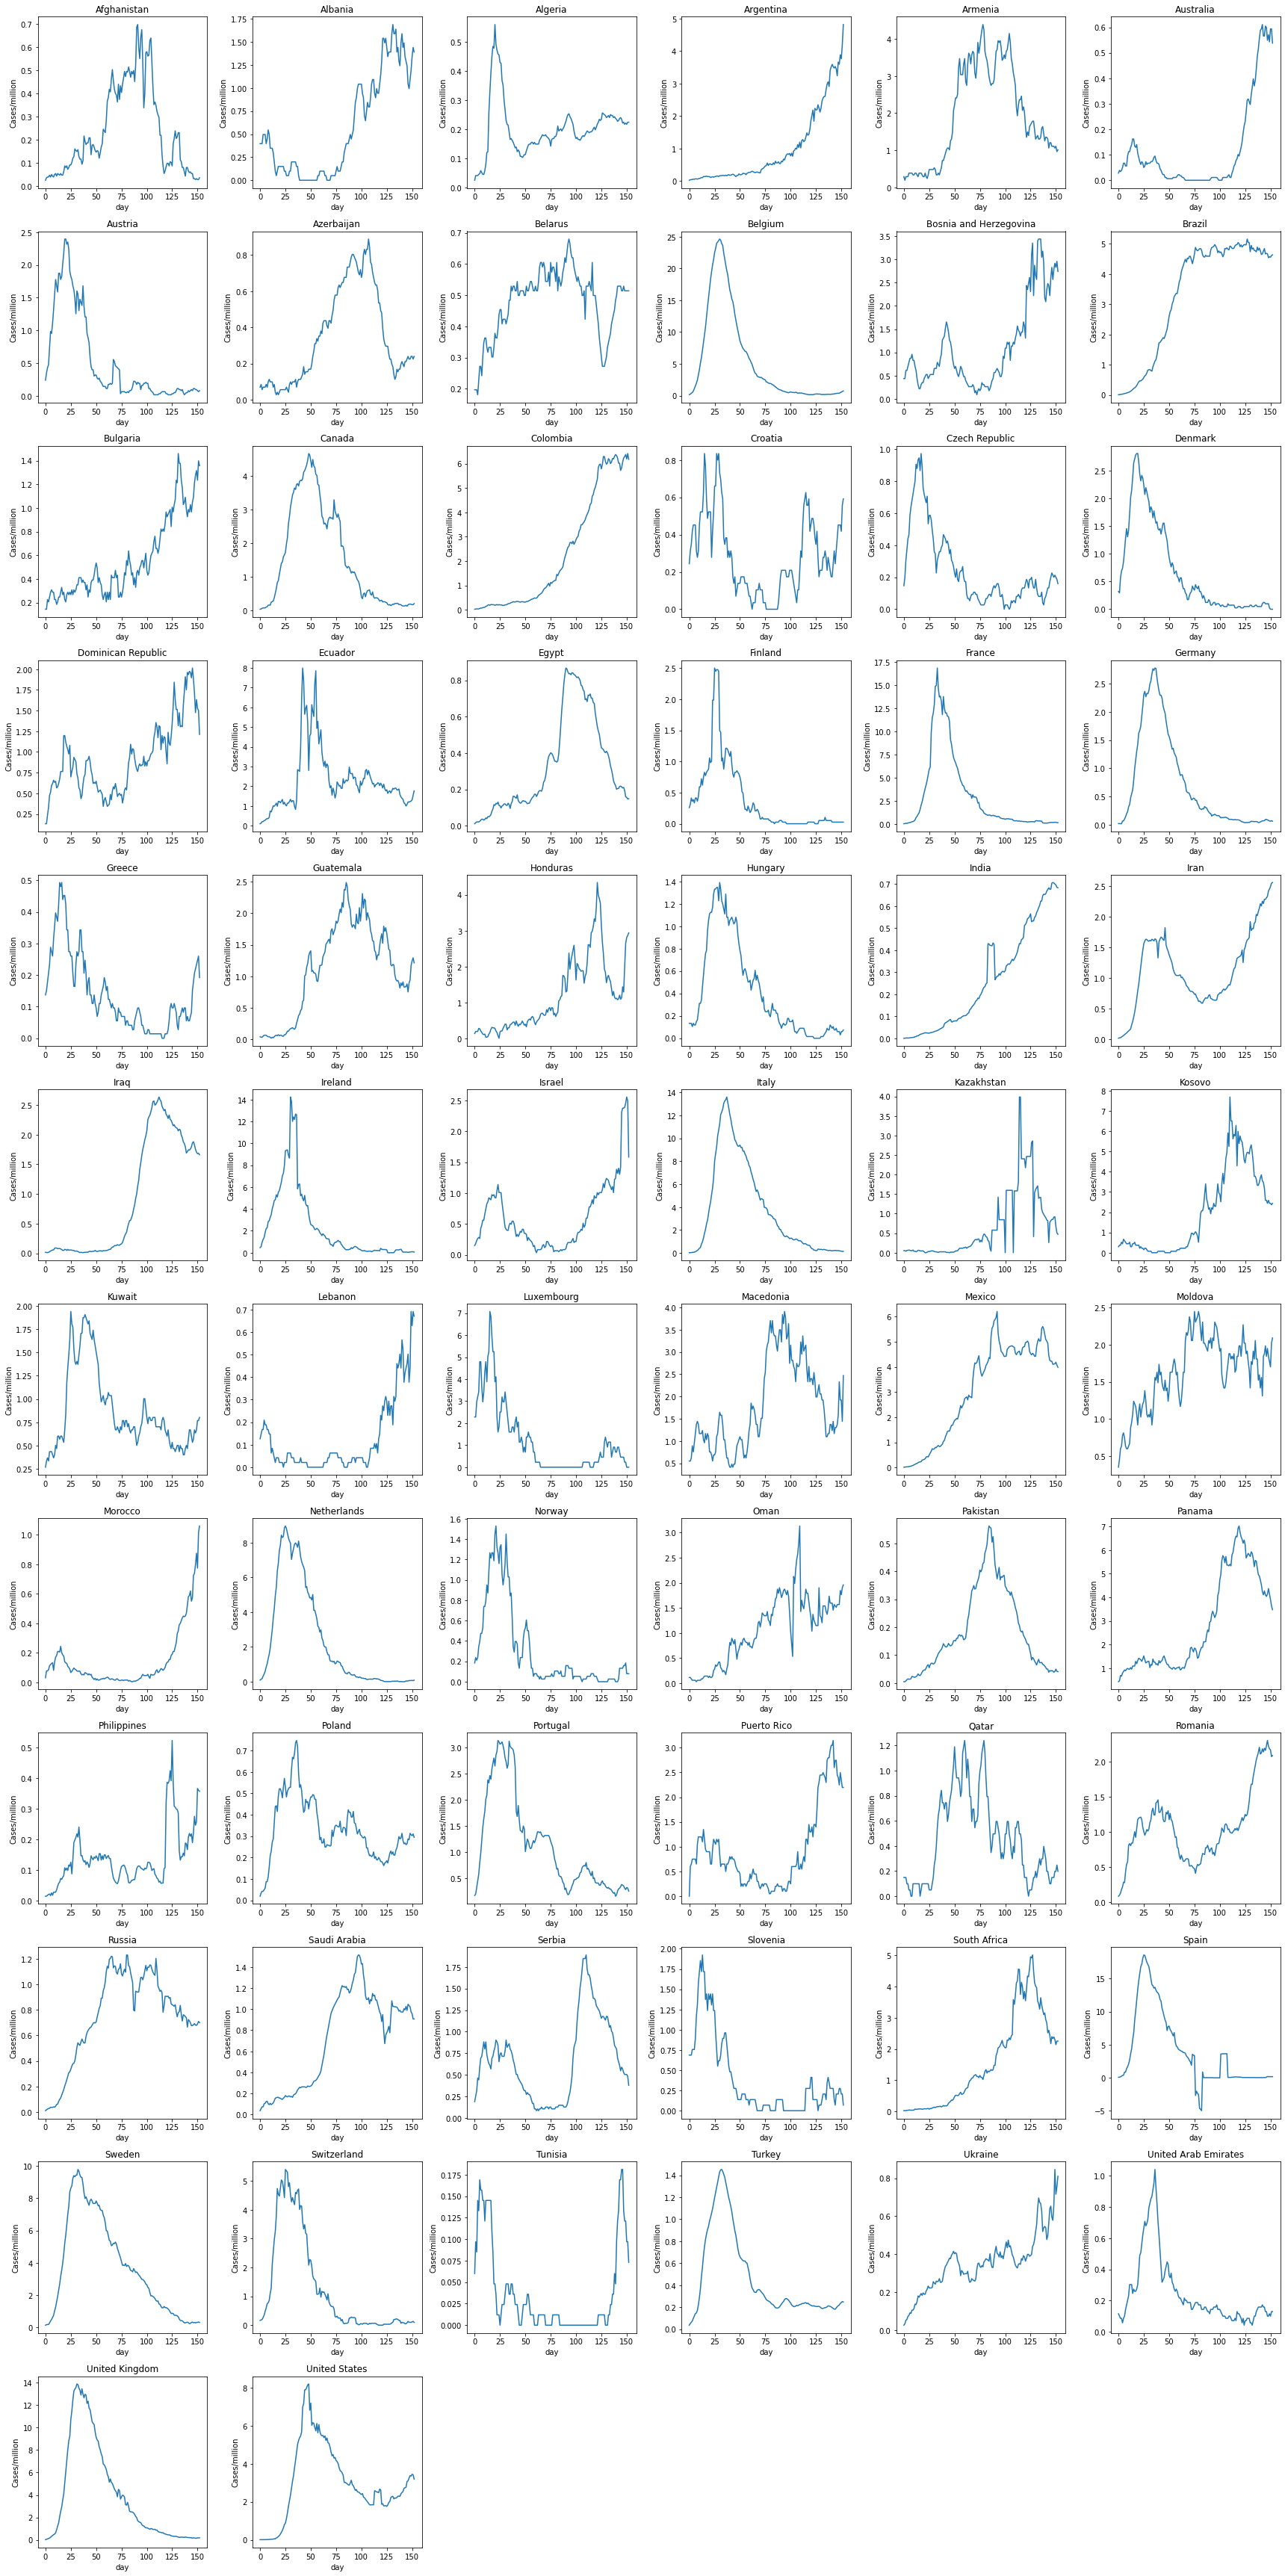

In [9]:
plot_all(countries,clusdata_all['deaths'])

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

In [ ]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [ ]:
datasets = [c for c in clusdata_all]
datasets

In [ ]:
len(countries)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [ ]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)

In [ ]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

First view of HDBSCAN, a hierarchical clustering algorithm, applied here to raw data.

HDBSCAN is a clustering algorithm developed by Campello, Moulavi, and Sander. 

It extends DBSCAN by converting it into a hierarchical clustering algorithm, 
and then using a technique to extract a flat clustering based in the stability of clusters.

In [6]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [7]:
foodeath.hdbscan()

cluster validity index = 0.3183090098950305
cluster validity of each cluster:
cluster 1 validity = 0.3183090098950305
cluster 2 validity = [0.44864131 0.30466945 0.34410283]


In [8]:
foodeath.umap(n_neighbors=4)  # execute the umap projection on the death data

In [9]:
len(foodeath.clus_labels)

70

In [10]:
foodeath.clus_labels

array([ 1,  2, -1,  2,  1,  2,  0,  1, -1,  0,  2, -1,  2,  0,  2, -1,  0,
        0,  2, -1,  1,  1,  0,  0,  0,  0,  1,  2,  0,  2,  2,  2,  0,  2,
        0, -1,  2,  0,  2,  0,  1,  1, -1,  2,  0,  0,  2,  1,  2,  2, -1,
        0,  0,  2, -1,  2, -1,  1, -1,  0,  2,  0,  0,  0, -1,  0,  2,  0,
        0,  0])

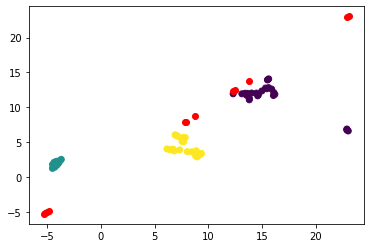

In [11]:
foodeath.plot_umap() # our plot routine in the ClusterFit class uses the clus_labels to colour points

There are only two clusters: the red points (-1 values) are unclustered.

# hdbscan on raw PCA

In this section we perform hierarchical clustering on the PCA projected data

In [12]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [13]:
foodeath.hdbscan_pca()

shape of cluster data =  (70, 10)
cluster validity index = 0.327916871273728
cluster validity of each cluster:
cluster 0 validity = 0.327916871273728
cluster 0 validity = [0.32342385 0.44747486]


In [14]:
foodeath.umap(n_neighbors=4)

In [15]:
len(foodeath.clus_labels)

70

In [16]:
foodeath.clus_labels

array([ 0,  0,  1,  0,  0,  0,  1,  0, -1,  1,  0, -1,  0,  1,  0, -1,  1,
        1,  0, -1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0,  1,  0,  0, -1,  0,  1,  1,  0,  0,  0,  0,  0,
        1,  1,  0, -1,  0,  0,  0, -1,  1,  0,  1,  1,  1, -1,  1,  0,  1,
        1, -1])

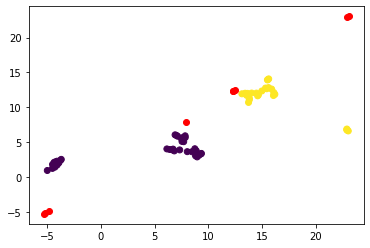

In [17]:
foodeath.plot_umap()

There are only two clusters: the red points (-1 values) are unclustered.

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [18]:
dat = foodeath.dat

In [19]:
foodeath.fitted.shape

(70, 10)

In [20]:
dat.shape

(70, 150)

In [21]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [22]:
len(dat[0])

150

Configure data a samples of a function on a grid, specify the grid as list of days:

In [23]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [24]:
len(dat_disc)

70

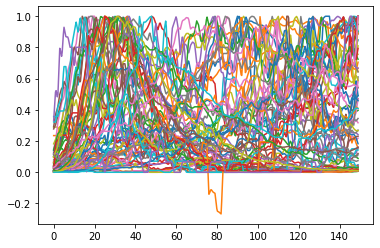

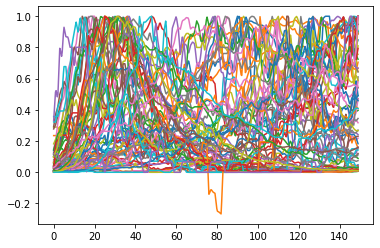

In [25]:
dat_disc.plot()

Text(0.5, 1.0, 'Spain')

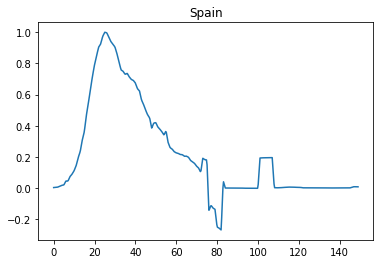

In [26]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

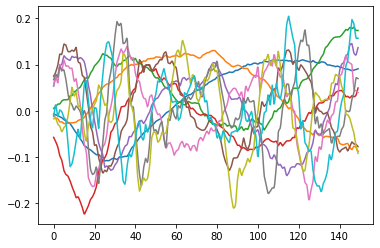

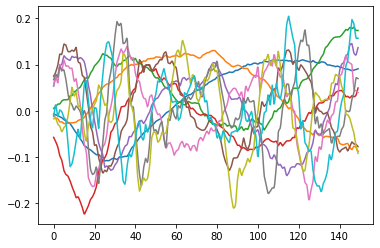

In [27]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


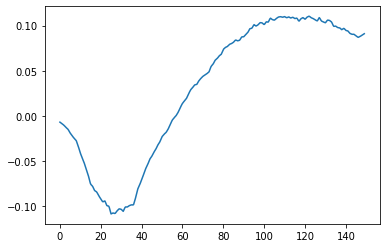

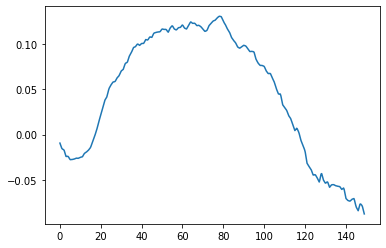

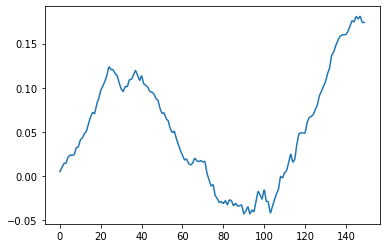

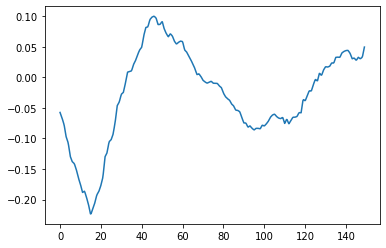

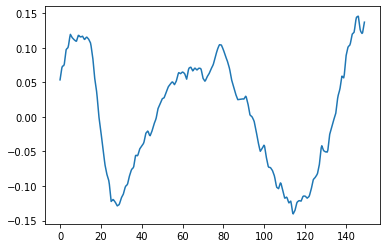

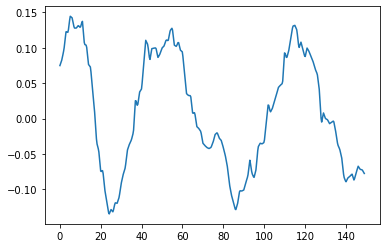

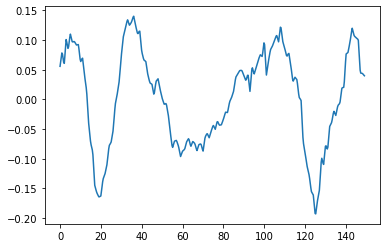

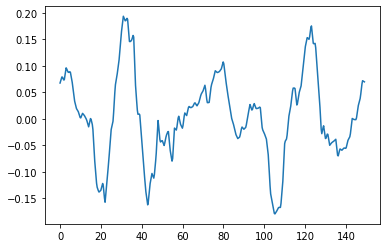

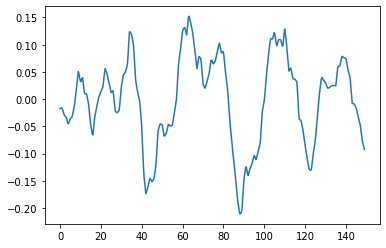

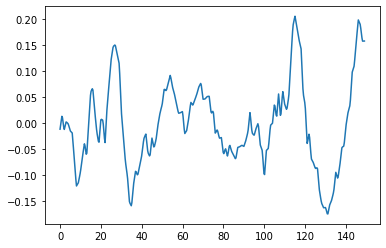

In [28]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [29]:
foo = fpca_disc.transform(dat_disc)

In [30]:
[x for x in dir(fpca_disc) if 'transform' in x]

['_transform_basis', '_transform_grid', 'fit_transform', 'transform']

In [31]:
type(foo)

numpy.ndarray

In [32]:
foo.shape

(70, 10)

In [33]:
foo.shape

(70, 10)

In [34]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   5 FPCAcomponents:   8 clusters;   54 clustered;   16 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   56 clustered;   14 unclustered;  validity = 0.281
hdbscan_min_clus= 2 :   7 FPCAcomponents:   8 clusters;   55 clustered;   15 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   5 clusters;   62 clustered;   8 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   4 clusters;   64 clustered;   6 unclustered;  validity = None
hdbscan_min_clus= 2 :   10 FPCAcomponents:   4 clusters;   64 clustered;   6 unclustered;  validity = 0.328
--------------------------
hdbscan_min_clus= 3 :   5 FPCAcomponents:   2 clusters;   61 clustered;   9 unclustered;  validity = 0.288
hdbscan_min_clus= 3 :   6 FPCAcomponents:   2 clusters;   64 clustered;   6 unclustered;  validity = 0.189
hdbscan_min_clus= 3 :   7 FPCAcomponents:   2 clusters;   64 clustered;   6 unclustered;  validity = 0.195
hdbscan_mi

In [35]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   3 clusters;   51 clustered;   19 unclustered;  validity = 0.373
hdbscan_min_clus= 2 :   4 FPCAcomponents:   3 clusters;   56 clustered;   14 unclustered;  validity = 0.278
hdbscan_min_clus= 2 :   5 FPCAcomponents:   2 clusters;   61 clustered;   9 unclustered;  validity = 0.288
hdbscan_min_clus= 2 :   6 FPCAcomponents:   2 clusters;   64 clustered;   6 unclustered;  validity = 0.189
hdbscan_min_clus= 2 :   7 FPCAcomponents:   2 clusters;   64 clustered;   6 unclustered;  validity = 0.195
hdbscan_min_clus= 2 :   8 FPCAcomponents:   2 clusters;   67 clustered;   3 unclustered;  validity = 0.189
hdbscan_min_clus= 2 :   9 FPCAcomponents:   3 clusters;   58 clustered;   12 unclustered;  validity = 0.304
hdbscan_min_clus= 2 :   10 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.294
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   3 clusters;   51 clustered;   19 unclustered;  validity = 0.373
hdbsc

In [36]:
labels

array([ 1,  1,  0,  1,  1,  1,  0,  1, -1,  0,  1, -1,  1,  0,  1, -1,  0,
        0,  1, -1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,
        0,  1,  1,  0,  1,  0,  1,  1, -1,  1,  0,  0,  1,  1,  1,  1,  1,
        0,  0,  1,  0,  1,  1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0,
        0,  0])

### integrated into ClusterFit

In [37]:
foo = ClusterFit(clusdata_all['deaths'])

In [38]:
foo.hdbscan_fpca()

hdbscan_min_clus= 4 :   5 FPCAcomponents:   2 clusters;   34 clustered;   36 unclustered;  validity = 0.088


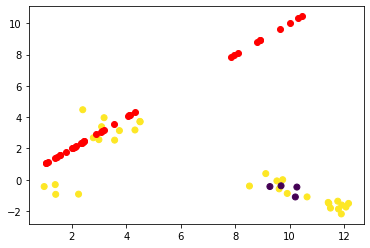

In [39]:
foo.umap()
foo.plot_umap()

### Cases

In [40]:
foocases = ClusterFit(clusdata_all['cases'])
dat = foocases.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [41]:
min_samples = 4
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   4 clusters;   50 clustered;   20 unclustered;  validity = 0.324
hdbscan_min_clus= 2 :   4 FPCAcomponents:   6 clusters;   35 clustered;   35 unclustered;  validity = None
hdbscan_min_clus= 2 :   5 FPCAcomponents:   6 clusters;   37 clustered;   33 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   3 clusters;   54 clustered;   16 unclustered;  validity = 0.282
hdbscan_min_clus= 2 :   7 FPCAcomponents:   3 clusters;   55 clustered;   15 unclustered;  validity = 0.132
hdbscan_min_clus= 2 :   8 FPCAcomponents:   3 clusters;   54 clustered;   16 unclustered;  validity = 0.257
hdbscan_min_clus= 2 :   9 FPCAcomponents:   3 clusters;   52 clustered;   18 unclustered;  validity = 0.254
hdbscan_min_clus= 2 :   10 FPCAcomponents:   5 clusters;   41 clustered;   29 unclustered;  validity = 0.251
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   4 clusters;   50 clustered;   20 unclustered;  validity = 0.324
hd

### Cases adj_nonlin

In [42]:
foocases_nonlin = ClusterFit(clusdata_all['cases_nonlin'])
dat = foocases_nonlin.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [43]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,16):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   6 clusters;   48 clustered;   22 unclustered;  validity = None
hdbscan_min_clus= 2 :   4 FPCAcomponents:   6 clusters;   42 clustered;   28 unclustered;  validity = None
hdbscan_min_clus= 2 :   5 FPCAcomponents:   8 clusters;   43 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   44 clustered;   26 unclustered;  validity = 0.29183
hdbscan_min_clus= 2 :   7 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.23451
hdbscan_min_clus= 2 :   8 FPCAcomponents:   7 clusters;   42 clustered;   28 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   7 clusters;   43 clustered;   27 unclustered;  validity = 0.26237
hdbscan_min_clus= 2 :   10 FPCAcomponents:   7 clusters;   43 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   11 FPCAcomponents:   7 clusters;   43 clustered;   27 unclustered;  validity = 0.23949
hdbscan_min_clus= 2 :  

hdbscan_min_clus= 7 :   13 FPCAcomponents:   2 clusters;   55 clustered;   15 unclustered;  validity = 0.18202
hdbscan_min_clus= 7 :   14 FPCAcomponents:   2 clusters;   55 clustered;   15 unclustered;  validity = 0.18614
hdbscan_min_clus= 7 :   15 FPCAcomponents:   2 clusters;   55 clustered;   15 unclustered;  validity = 0.17587
--------------------------


### Scan of optimal clusterings for 6 datasets and 4 clustering quality criteria

The validity calculated by hdbscan does seem to bias lower dimensional embeddings. We study this in a separate notebook "Calibration_of_Validity". Here we consider 4 scorings: the validity, the dimensionality scaled validity, and two combined scorings which also penalizes the number of unclustered points as well as how far the number of clusters departs from 4.

** move Ncomponents to outside loop**

In [44]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for ncomp in range(2,16):
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   44 clustered;   26 unclustered;  validity = 0.31817 validitysc = 0.31817 score1: 10.343 score2: 32.687
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   10 unclustered;  validity = 0.46493 validitysc = 0.46493 score1: 4.151 score2: 4.302
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.4

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   64 clustered;   6 unclustered;  validity = 0.32839 validitysc = 0.56061 score1: 2.984 score2: 2.141
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   68 clustered;   2 unclustered;  validity = 0.27988 validitysc = 0.50352 score1: 3.3

hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   49 clustered;   21 unclustered;  validity = 0.41641 validitysc = 0.50071 score1: 7.697 score2: 14.679
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   46 clustered;   24 unclustered;  validity = 0.41168 validitysc = 0.49584 score1: 7.817 

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   44 clustered;   26 unclustered;  validity = 0.28099 validitysc = 0.5049 score1: 8.681 score2: 18.023
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.26758 validitysc = 0.48805 score1: 8.849 score2: 17.

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   59 clustered;   11 unclustered;  validity = 0.23881 validitysc = 0.23881 score1: 6.887 score2: 11.515
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   59 clustered;   11 unclustered;  validity = 0.23881 validitysc = 0.23881 score1: 6.887 score2: 11.515
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   59 clustered;   11 unclustered;  validity = 0.23881 validitysc = 0.23881 score1: 6.887 score2: 11.515
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   54 clustered;   16 unclustered;  validity = 0.37728 validitysc = 0.4599 score1: 7.874 score2: 15.656
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   48 clustered;   22 unclustered;  validity = 0.39676 validitysc = 0.48036 score1: 7.982 score2: 16.03
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   25 unclustered;  validity = 0.35802 validitysc = 0.4394 score1: 7

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   22 unclustered;  validity = 0.19071 validitysc = 0.38077 score1: 7.026 score2: 11.555
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   22 unclustered;  validity = 0.19071 validitysc = 0.38077 score1: 7.026 score2: 11.555
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   22 unclustered;  validity = 0.19071 validitysc = 0.38077 score1: 7.026 score2: 11.555
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   22 unclustered;  validity = 0.19071 validitysc = 0.38077 score1: 7.026 score2: 11.555
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   57 clustered;   13 unclustered;  validity = 0.22805 validitysc = 0.43531 score1: 5.397 score2: 7.466
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   57 clustered;   13 unclustered;  validity = 0.22805 validitysc = 0.43531 score1: 5.397 score2: 7.466


hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   66 clustered;   4 unclustered;  validity = 0.13846 validitysc = 0.13846 score1: 8.022 score2: 5.778
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   68 clustered;   2 unclustered;  validity = 0.09463 validitysc = 0.09463 score1: 11.468 score2: 5.284
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   12 unclustered;  validity = 0.48051 validitysc = 0.56522 score1: 6.669 score2: 9.554
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   58 clustered;   12 unclustered;  validity = 0.45017 validitysc = 0.53504 score1: 6.269 score2: 8.971
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   58 clustered;   12 unclustered;  validity = 0.34729 validitysc = 0.42785 score1: 6.237 score2: 9.816
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   53 clustered;   17 unclustered;  validity = 0.31812 validitysc = 0.39603 score1: 6.92

hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   39 clustered;   31 unclustered;  validity = 0.29462 validitysc = 0.52151 score1: 8.118 score2: 11.889
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   48 clustered;   22 unclustered;  validity = 0.314 validitysc = 0.5443 score1: 6.737 score2: 10.105
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.30313 validitysc = 0.53163 score1: 5.281 score2: 6.772
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.30313 validitysc = 0.53163 score1: 5.281 score2: 6.772
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.30313 validitysc = 0.53163 score1: 5.281 score2: 6.772
--------------------------
hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.28103 validitysc = 0.5139 score1:

hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   18 unclustered;  validity = 0.41304 validitysc = 0.49724 score1: 6.111 score2: 9.05
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   18 unclustered;  validity = 0.41304 validitysc = 0.49724 score1: 6.111 score2: 9.05
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.39 score2: 9.855
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.39 score2: 9.855
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.39 score2: 9.855
hdbscan:  9 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   49 clustered;   21 unclustered;  validity = 0.13922 validitysc = 0.18522 score1: 10.099 score2: 28.345
-------------

hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20546 validitysc = 0.40291 score1: 5.882 score2: 8.935
--------------------------
hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   8 clusters;   49 clustered;   21 unclustered;  validity = 0.2737 validitysc = 0.50477 score1: 8.181 score2: 16.641
hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   7 clusters;   46 clustered;   24 unclustered;  validity = 0.26453 validitysc = 0.49311 score1: 8.328 score2: 17.035
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   44 clustered;   26 unclustered;  validity = 0.28608 validitysc = 0.52012 score1: 7.623 score2: 12.497
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20464 validitysc = 0.41034 score1: 5.837 score2: 8.773
hdbscan:  7 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20464 validitysc = 0.41034 sco

hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.39 score2: 9.855
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.39 score2: 9.855
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.39 score2: 9.855
hdbscan:  9 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   49 clustered;   21 unclustered;  validity = 0.13922 validitysc = 0.18522 score1: 10.099 score2: 28.345
--------------------------
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   8 clusters;   51 clustered;   19 unclustered;  validity = 0.33913 validitysc = 0.46491 score1: 7.951 score2: 16.347
hdbscan:  4 minc:   2 mins:   4 FPCAcomponents:   5 clusters;   49 clustered;   21 unclustered;  validity = 0.28162 validitysc = 0.39895 score1: 7.2

hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   8 clusters;   49 clustered;   21 unclustered;  validity = 0.2737 validitysc = 0.50477 score1: 8.181 score2: 16.641
hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   7 clusters;   46 clustered;   24 unclustered;  validity = 0.26453 validitysc = 0.49311 score1: 8.328 score2: 17.035
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   44 clustered;   26 unclustered;  validity = 0.28608 validitysc = 0.52012 score1: 7.623 score2: 12.497
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20464 validitysc = 0.41034 score1: 5.837 score2: 8.773
hdbscan:  7 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20464 validitysc = 0.41034 score1: 5.837 score2: 8.773
hdbscan:  8 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20464 validitysc = 0.41034 score1: 5.837 score2: 8.773
hd

### stash results in data frame

In [45]:

def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
reportdata = [None]*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
outlierdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
infomax =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
cnt=0
for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+1,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+1] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+2,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+2] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+3,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+3] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            info.loc[cnt] = [case,minc,min_samples,ncomp,nclustered,nunclustered,validity,validitysc,score1,score2]
            cnt = cnt+1

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   44 clustered;   26 unclustered;  validity = 0.31817 validitysc = 0.31817 score1: 10.343 score2: 32.687
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   10 unclustered;  validity = 0.46493 validitysc = 0.46493 score1: 4.151 score2: 4.302
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.4

hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
----------

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   53 clustered;   17 unclustered;  validity = 0.51445 validitysc = 0.51445 score1: 7.344 score2: 13.218
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   58 clustered;   12 unclustered;  validity = 0.36783 validitysc = 0.36783 score1: 6.119 score2: 9.787
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   58 clustered;   12 unclustered;  validity = 0.31272 validitysc = 0.31272 score1: 6.098 score2: 9.593
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  9 

hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   7 clusters;   44 clustered;   26 unclustered;  validity = 0.27738 validitysc = 0.4901 score1: 8.74 score2: 18.567
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.26336 validitysc = 0.47236 score1: 8.917 score2: 18.418
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   21 unclustered;  validity = 0.12401 validitysc = 0.26171 score1: 8.021 score2: 16.048
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
hdbscan:  9 minc:   2

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   52 clustered;   18 unclustered;  validity = 0.43989 validitysc = 0.43989 score1: 7.873 score2: 16.368
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   64 clustered;   6 unclustered;  validity = 0.18751 validitysc = 0.18751 score1: 7.033 score2: 8.0
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   64 clustered;   6 unclustered;  validity = 0.18751 validitysc = 0.18751 score1: 7.033 score2: 8.0
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   59 clustered;   11 unclustered;  validity = 0.23881 validitysc = 0.23881 score1: 6.887 score2: 11.515
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   59 clustered;   11 unclustered;  validity = 0.23881 validitysc = 0.23881 score1: 6.887 score2: 11.515
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   59 clustered;   11 unclustered;  validity = 0.23881 validitysc = 0.23881 score1: 6.887 score2: 11.515
hdbscan:  9 

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   49 clustered;   21 unclustered;  validity = 0.30207 validitysc = 0.5201 score1: 6.623 score2: 10.094
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   21 unclustered;  validity = 0.29701 validitysc = 0.51409 score1: 6.145 score2: 8.17
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   21 unclustered;  validity = 0.29701 validitysc = 0.51409 score1: 6.145 score2: 8.17
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   12 unclustered;  validity = 0.28188 validitysc = 0.49569 score1: 4.917 score2: 6.052
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   12 unclustered;  validity = 0.28188 validitysc = 0.49569 score1: 4.917 score2: 6.052
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   45 clustered;   25 unclustered;  validity = 0.28816 validitysc = 0.5137 score1: 7.947

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   66 clustered;   4 unclustered;  validity = 0.18652 validitysc = 0.18652 score1: 6.661 score2: 5.361
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   66 clustered;   4 unclustered;  validity = 0.13846 validitysc = 0.13846 score1: 8.022 score2: 5.778
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   68 clustered;   2 unclustered;  validity = 0.09463 validitysc = 0.09463 score1: 11.468 score2: 5.284
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   12 unclustered;  validity = 0.48051 validitysc = 0.56522 score1: 6.669 score2: 9.554
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   58 clustered;   12 unclustered;  validity = 0.45017 validitysc = 0.53504 score1: 6.269 score2: 8.971
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   58 clustered;   12 unclustered;  validity = 0.34729 validitysc = 0.42785 score1: 6.237

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   43 clustered;   27 unclustered;  validity = 0.32351 validitysc = 0.55514 score1: 7.701 score2: 12.159
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   39 clustered;   31 unclustered;  validity = 0.29462 validitysc = 0.52151 score1: 8.118 score2: 11.889
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   48 clustered;   22 unclustered;  validity = 0.314 validitysc = 0.5443 score1: 6.737 score2: 10.105
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.30313 validitysc = 0.53163 score1: 5.281 score2: 6.772
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.30313 validitysc = 0.53163 score1: 5.281 score2: 6.772
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.30313 validitysc = 0.53163 score1: 5.281 score2: 6.772
----

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   54 clustered;   16 unclustered;  validity = 0.4367 validitysc = 0.4367 score1: 5.99 score2: 9.16
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   47 clustered;   23 unclustered;  validity = 0.37806 validitysc = 0.37806 score1: 7.245 score2: 12.167
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   47 clustered;   23 unclustered;  validity = 0.37806 validitysc = 0.37806 score1: 7.245 score2: 12.167
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   55 clustered;   15 unclustered;  validity = 0.38348 validitysc = 0.46644 score1: 7.644 score2: 14.471
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   18 unclustered;  validity = 0.41304 validitysc = 0.49724 score1: 6.111 score2: 9.05
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   18 unclustered;  validity = 0.41304 validitysc = 0.49724 score1: 6.111

hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   50 clustered;   20 unclustered;  validity = 0.37802 validitysc = 0.60347 score1: 6.157 score2: 8.285
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   60 clustered;   10 unclustered;  validity = 0.0683 validitysc = 0.1551 score1: 9.447 score2: 19.342
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   60 clustered;   10 unclustered;  validity = 0.0683 validitysc = 0.1551 score1: 9.447 score2: 19.342
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   48 clustered;   22 unclustered;  validity = 0.26594 validitysc = 0.48595 score1: 8.458 score2: 18.109
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   47 clustered;   23 unclustered;  validity = 0.29254 validitysc = 0.519 score1: 7.527 score2: 13.295
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   43 clustered;   27 unclustered;  validity = 0.28702 validitysc = 0.51231 score1: 7.

hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   47 clustered;   23 unclustered;  validity = 0.37806 validitysc = 0.37806 score1: 7.245 score2: 12.167
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   47 clustered;   23 unclustered;  validity = 0.37806 validitysc = 0.37806 score1: 7.245 score2: 12.167
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   55 clustered;   15 unclustered;  validity = 0.38348 validitysc = 0.46644 score1: 7.644 score2: 14.471
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   18 unclustered;  validity = 0.41304 validitysc = 0.49724 score1: 6.111 score2: 9.05
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   18 unclustered;  validity = 0.41304 validitysc = 0.49724 score1: 6.111 score2: 9.05
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   57 clustered;   13 unclustered;  validity = 0.20318 validitysc = 0.26383 score1: 6.

hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   60 clustered;   10 unclustered;  validity = 0.0683 validitysc = 0.1551 score1: 9.447 score2: 19.342
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   48 clustered;   22 unclustered;  validity = 0.26594 validitysc = 0.48595 score1: 8.458 score2: 18.109
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   47 clustered;   23 unclustered;  validity = 0.29254 validitysc = 0.519 score1: 7.527 score2: 13.295
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   43 clustered;   27 unclustered;  validity = 0.28702 validitysc = 0.51231 score1: 7.852 score2: 13.176
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20546 validitysc = 0.40291 score1: 5.882 score2: 8.935
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20546 validitysc = 0.40291 score1

In [46]:
info.shape

(588, 10)

In [47]:
info

type minc mins ncomp clustered unclustered  validity  \
0           deaths    3    2     2        44          26  0.318166   
1           deaths    4    2     2        60          10  0.464930   
2           deaths    5    2     2        61           9  0.435054   
3           deaths    6    2     2        61           9  0.435054   
4           deaths    7    2     2        61           9  0.435054   
..             ...  ...  ...   ...       ...         ...       ...   
583  cases_nonlinr    5    2    15        39          31  0.280557   
584  cases_nonlinr    6    2    15        49          21  0.307536   
585  cases_nonlinr    7    2    15        58          12  0.179684   
586  cases_nonlinr    8    2    15        58          12  0.179684   
587  cases_nonlinr    9    2    15        58          12  0.179684   

     validitysc     score1     score2  
0      0.318166  10.343018  32.687389  
1      0.464930   4.150861   4.301721  
2      0.435054   4.598563   5.171768  
3      0.435054   4.598563   5.171768  
4      0.435054   4.598563   5.171768  
..          ...        ...        ...  
583    0.521230   8.118538  11.894938  
584    0.553546   6.506534   9.484301  
585    0.379466   6.035281   9.487012  
586    0.379466   6.035281   9.487012  
587    0.379466   6.035281   9.487012  

[588 rows x 10 columns]

In [48]:
set(info['ncomp'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [49]:
set(info['type'])

{'cases',
 'cases_lin2020',
 'cases_nonlin',
 'cases_nonlinr',
 'cases_pwlfit',
 'deaths'}

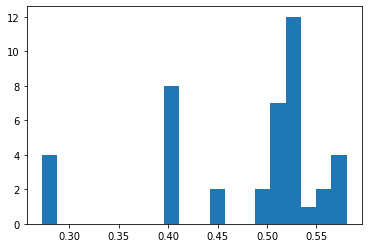

In [50]:
foo = info[info['ncomp']==11]['validitysc']
plt.hist(foo,bins=20);

In [51]:
datlen = len(set(info['ncomp']))

datlen

14

In [52]:
'ncomp = {}'.format(5)

'ncomp = 5'

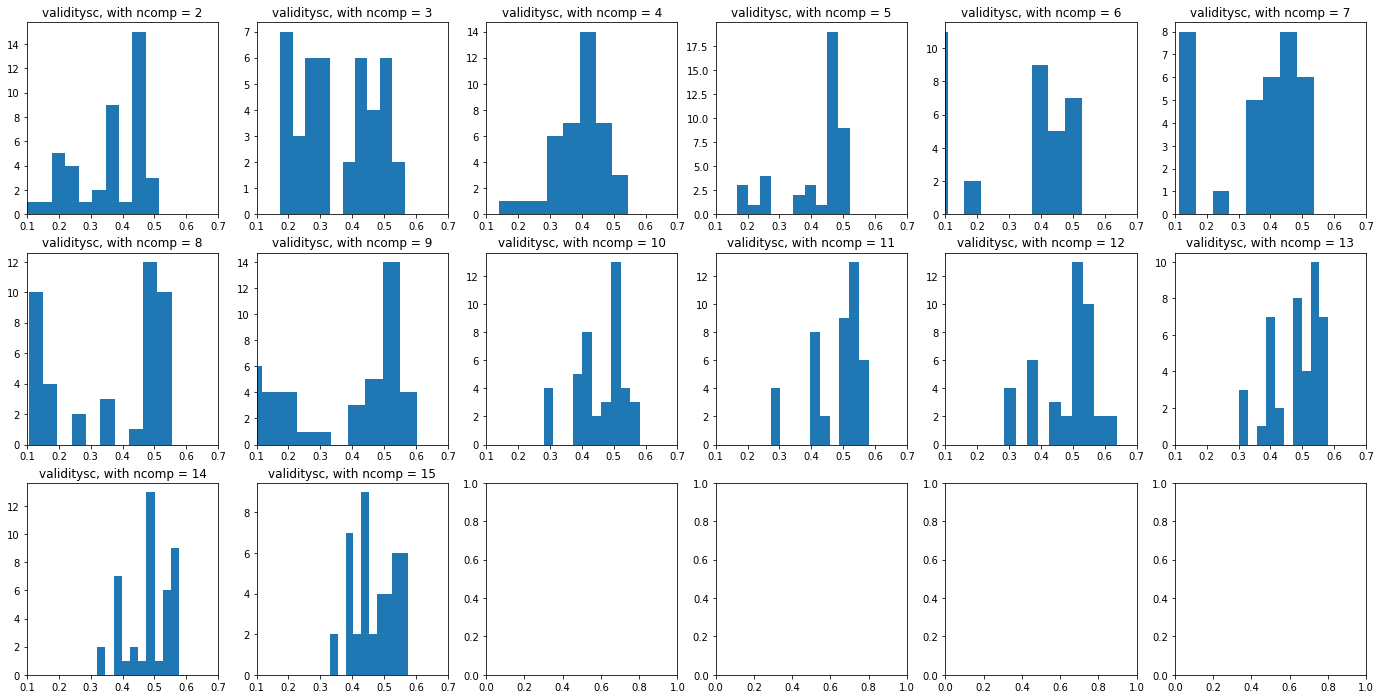

In [53]:
max_cols = 6
vals = set(info['ncomp'])
max_rows = len(vals) // max_cols +1
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

for idx, val  in enumerate(vals):
    row = idx // max_cols
    col = idx % max_cols
    axes[row,col].hist(info[info['ncomp']==val]['validitysc'])
    axes[row,col].set_title('validitysc, with ncomp = {}'.format(val))
    axes[row,col].set_xlim((.1,.7))

In [54]:
info['validitysc']

0      0.318166
1      0.464930
2      0.435054
3      0.435054
4      0.435054
         ...   
583    0.521230
584    0.553546
585    0.379466
586    0.379466
587    0.379466
Name: validitysc, Length: 588, dtype: float64

### Analysis of cluster membership probabilities_ and outlier_scores_
Note that:
* probabilites_ p are 0 if rated as belonging to unclustered class (-1)
* but the outlier_scores_ are non zero for all points
* outlier_scores_ are 1-p if the points belong to a particular cluster
* and are larger if more likely to be an outlier

In [55]:
print(np.shape(outlierdata))
outlierdata

(24, 70)


array([[0.03990378, 0.06919751, 0.14583504, ..., 0.26744433, 0.08363153,
        0.        ],
       [0.        , 0.09349768, 0.46409194, ..., 0.36972496, 0.        ,
        0.32585317],
       [0.11099619, 0.30796072, 0.46759938, ..., 0.40526714, 0.08795761,
        0.3264089 ],
       ...,
       [0.27108465, 0.        , 0.        , ..., 0.05020236, 0.3019562 ,
        0.0905454 ],
       [0.2694    , 0.        , 0.        , ..., 0.05009732, 0.30972141,
        0.23076676],
       [0.26819681, 0.        , 0.        , ..., 0.02073152, 0.30908274,
        0.08458216]])

(0.0, 1.0)

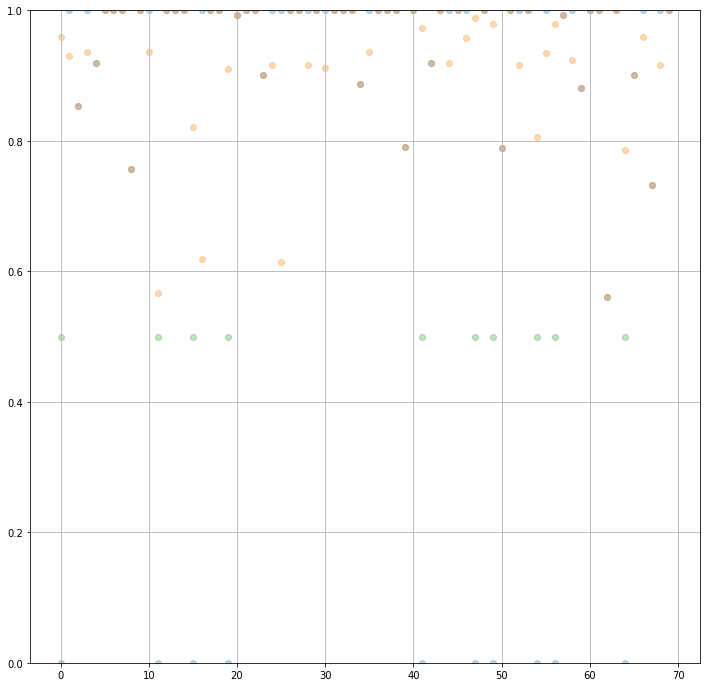

In [56]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(range(len(outlierdata[0])),probdata[0],alpha=0.3)
ax.scatter(range(len(outlierdata[0])),1-outlierdata[0],alpha=0.3)
ax.scatter(range(len(outlierdata[0])),-clusdata[0]-0.5,alpha=0.3)
ax.grid(b=True,which='both',axis='both')
ax.set_ylim(0,1)

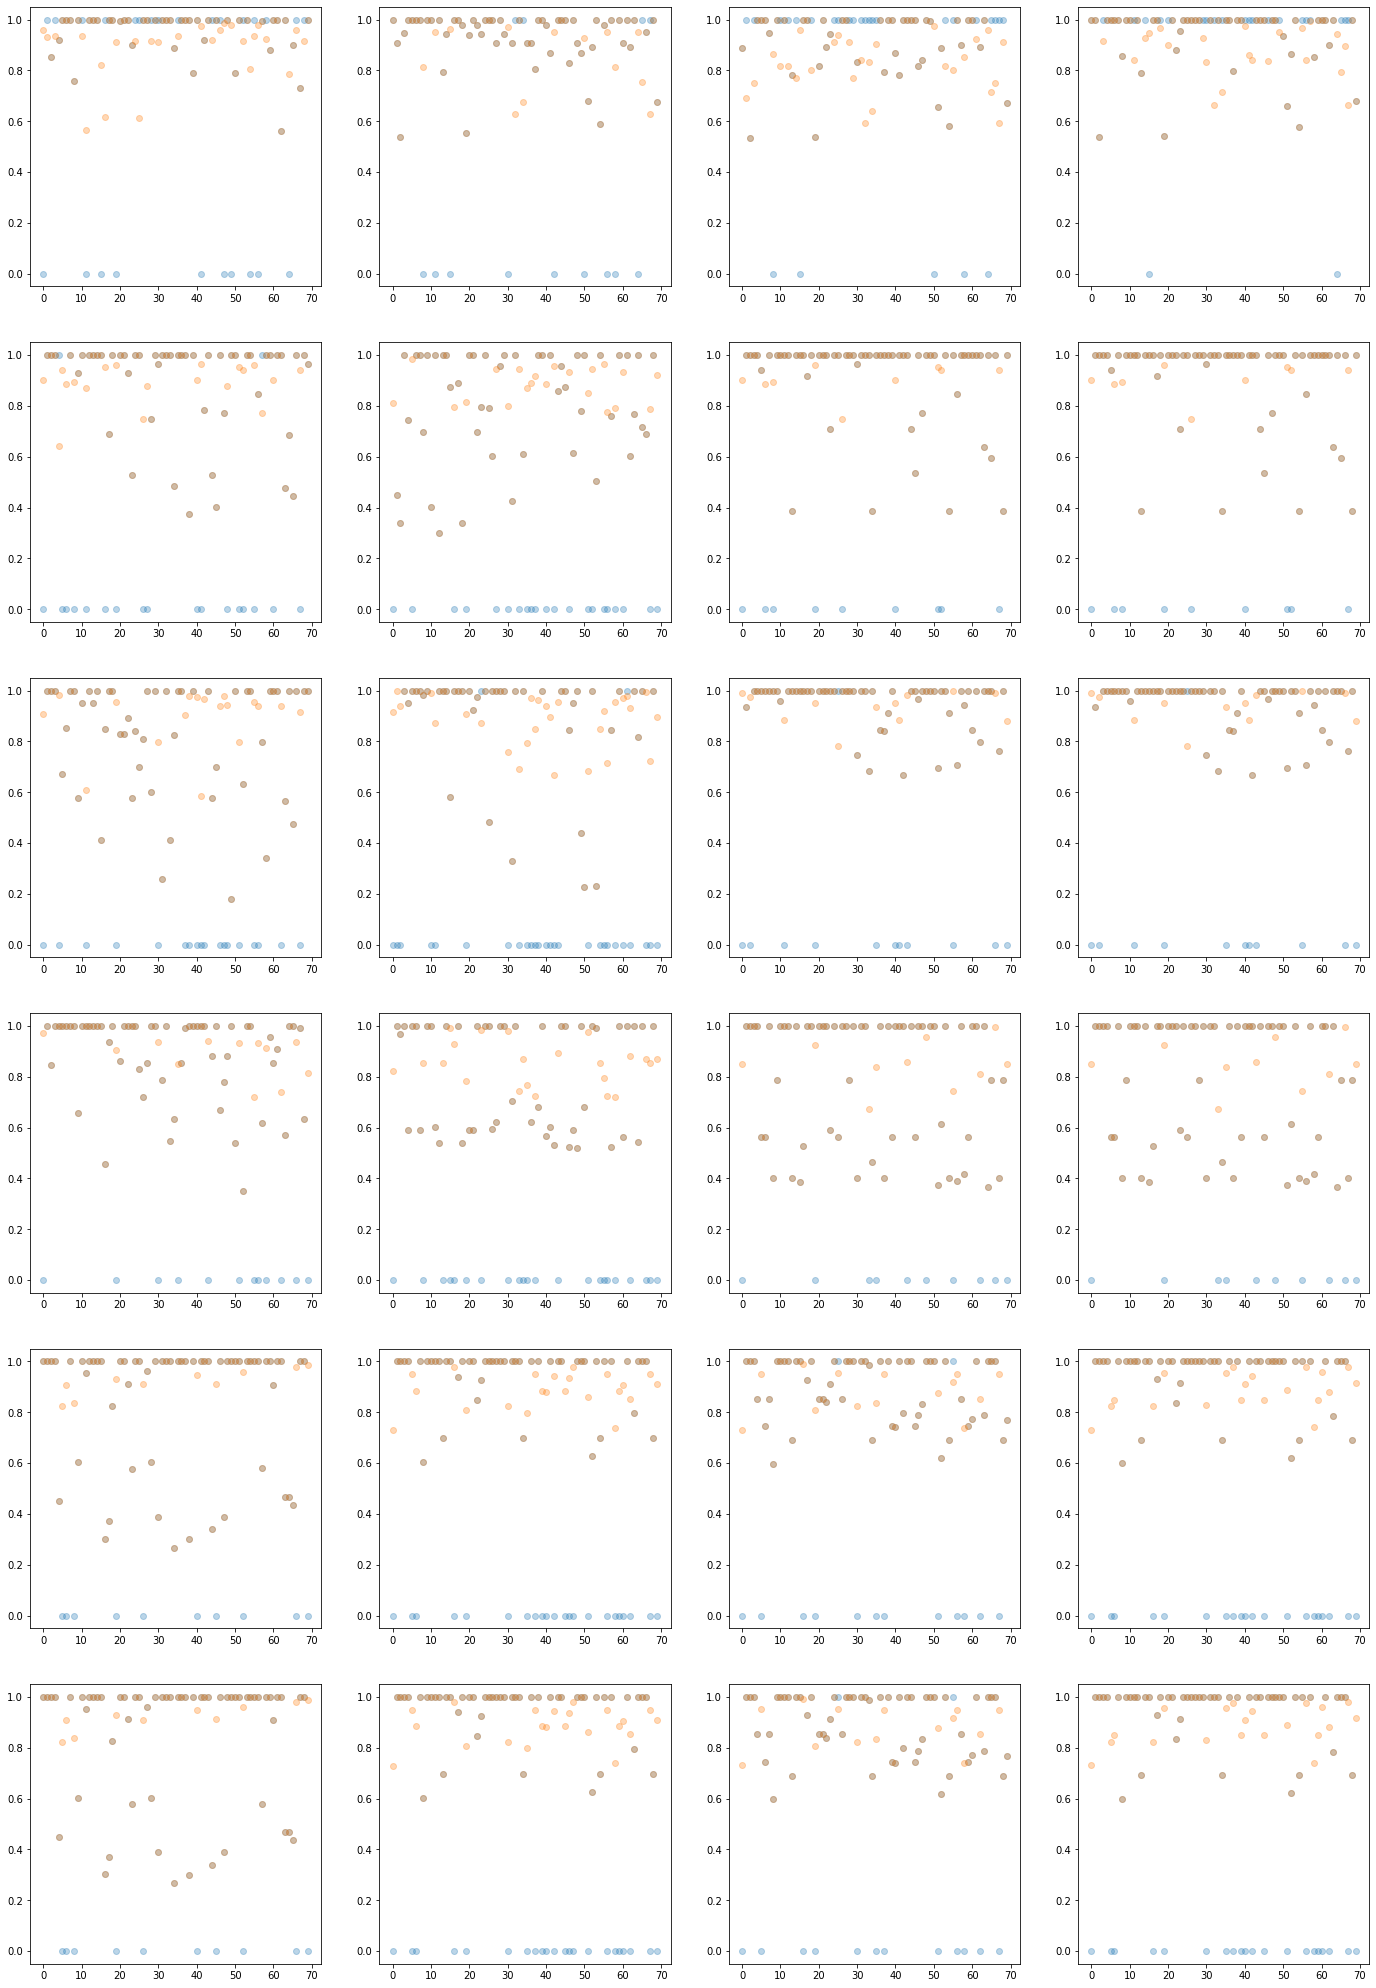

In [57]:
fig,axes = plt.subplots(6,4,figsize=(24,36))
for n in range(24):
    i = n %4
    j = int (n/4)
    ax = axes[j,i]
    ax.scatter(range(len(outlierdata[0])),probdata[n],alpha=0.3)
    ax.scatter(range(len(outlierdata[0])),1-outlierdata[n],alpha=0.3)
    #ax.set_ylim(0.03,0.7)

In [58]:
probdata2 = np.where(probdata==0.,outlierdata,probdata)

### Clustering consensus between 6 data sets and 4 optimal clusterings per set

The alignment between clusterings is complex in general. See section 7 for a more sophisticated, but NYI approach for our data. Here we analyse and compare clusterings using colour index matching. Note that we now use outlier_scores_ for unclustered countries (not 0 as before) -> gray levels

In [59]:
refclustering = 21    # ficudial column; change here.
clus_argsort = np.lexsort((countries,clusdata[refclustering]))  # must run a scan above to define and fill clusdata.
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata2.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata2)):
    foo = probdata2[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata2[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [60]:
np.shape(clusdata)
clusdata

array([[-1,  3,  3, ...,  0,  0,  1],
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 3,  1,  0, ...,  0,  0,  0],
       ...,
       [-1,  2,  2, ..., -1,  0, -1],
       [-1,  0,  0, ..., -1,  1,  0],
       [-1,  2,  2, ..., -1,  0, -1]])

In [61]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

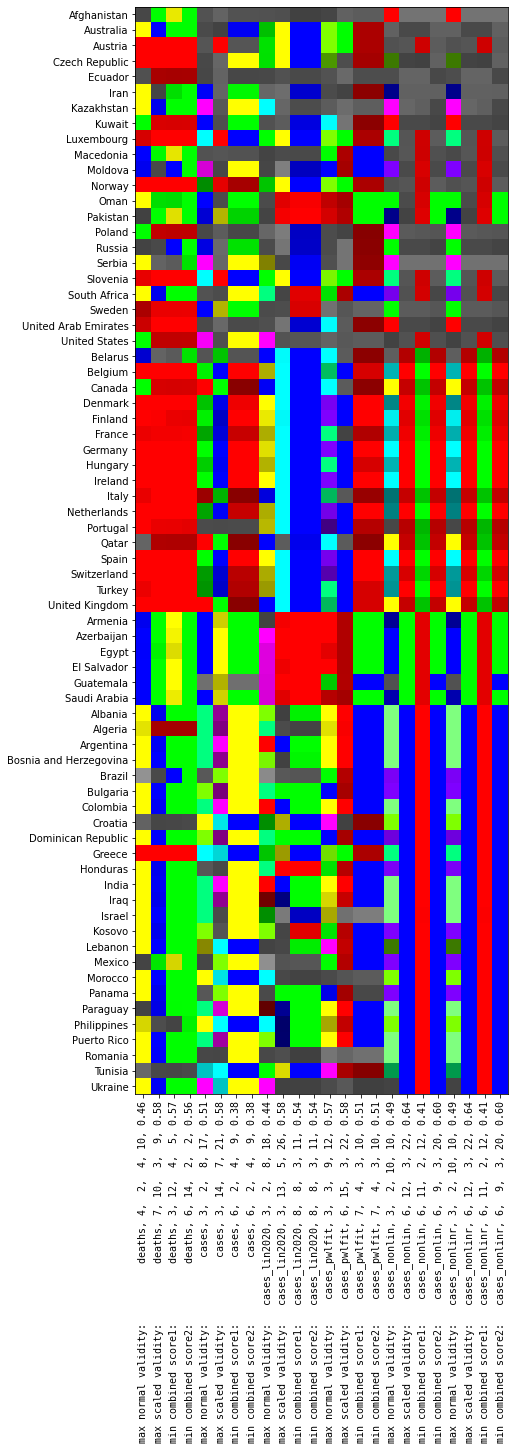

In [62]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

This cluster comparison suffers from the independent ordering of clusters, which makes the colourings different in each column. In general, given the differnet number of clusters this is a nontrivial problem in graph matching. We adopt a two phase approach in what follows: 
* first choose a reference column (here column `refclustering=1` (defined in a cell above), not zero) with a good differentiated clustering.
* relabel the clusters in each other column with the colours of the best matching cluster in the reference column (`coldata_adj`)
* then relabel the colours again in case of split clusters, with the hybrid colour of the source cluster colour in reference column and the destination colour (`coldata_adj2`)

`coldata`, `coldata_adj` and `coldata_adj2` are 3-d matrices: rows labeled by countries, columns labeled by report string (from max scoring), and 3 values for RGB in z-dim.

In [63]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def score_int_union(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a)&set(b))/len(set(a)|set(b))  # length intersection divided by length union
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def closest_hue(hue,huelist):
    mindist = 2.
    imin = -1
    for i,h in enumerate(huelist):
        if h > hue:
            dist = min(h-hue,hue+1-h)
        else:
            dist = min(hue-h,h+1-hue)
        if dist < mindist:
            mindist = dist
            imin = i
    return imin

def color_mean_rgb_to_hsv(rgb_colours,weights=None): 
    """ the hue is a circular quantity, so mean needs care
        see https://en.wikipedia.org/wiki/Mean_of_circular_quantities
    """
    pi = np.pi
    hsum = 0.
    ssum = 0.
    vsum = 0.
    asum = 0.
    bsum = 0.
    wsum = 0.
    if weights == None:
        weights = [1 if mpcolors.rgb_to_hsv(c)[1] > 0 else 0 for c in rgb_colours] # designed to exclude -1 unclustered colours
    elif weights == 'all':
        weights = [1 for c in rgb_colours]
    for i,c in enumerate(rgb_colours):
        hsvcol = mpcolors.rgb_to_hsv(c)
        h = hsvcol[0]
        asum = asum + np.sin(h*2*pi)*weights[i]
        bsum = bsum + np.cos(h*2*pi)*weights[i]
        ssum = ssum + hsvcol[1]*weights[i]
        vsum = vsum + hsvcol[2]*weights[i]
        wsum = wsum + weights[i]
    asum = asum/wsum
    bsum = bsum/wsum
    h = np.arctan2(asum,bsum)/(2*pi)
    if h < 0.:
        h = 1.+h

    s = ssum/wsum
    v = vsum/wsum
    # print(rgb_colours,'mean',mpcolors.hsv_to_rgb([h,s,v]))
    if h < 0.:
        print('error in color_mean, hue out of range',h)
        h = 0.
    if h > 1.:
        print('error in color_mean, hue out of range',h)
        h = 1.
    return [h,s,v]
        
def size_order(clusterings):
    """ relabel clusters in each clustering in order of increasing size"""
    clusterings_o = np.zeros(clusterings.shape,dtype = int) 
    for i,clustering in enumerate(clusterings):
        labels = list(set(clustering)-set([-1]))
        sizes = np.zeros(len(labels),dtype = int)
        for j,lab in enumerate(labels):
            sizes[j] = len(matchset(clustering,lab))
        order = np.flip(np.argsort(sizes))
        clusterings_o[i,:] = [order[c] if c != -1 else c for c in clustering]
    return clusterings_o
                      
def clust(clustering_a,clustering_b,colors_a,colors_b,relabel=True,merge=True): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = list(set(clustering_a))
    labels_b = list(set(clustering_b))
    newcolors_b = np.zeros((len(colors_b),3),dtype=float)
    newcolors_b[:,:] = colors_b[:,:]
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {}
    b_cols = {}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int_union(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:(maxlab,maxscore)})
    maxvals_a_to_b = [a_to_b[a][1] for a in labels_a]
    reorder_a = np.flip(np.argsort(maxvals_a_to_b))
    labels_a_sort = [labels_a[r] for r in list(reorder_a)]

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int_union(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:(maxlab,maxscore)})
    maxvals_b_to_a = [b_to_a[b][1] for b in labels_b]
    reorder_b = np.flip(np.argsort(maxvals_b_to_a))
    labels_b_sort = [labels_b[r] for r in list(reorder_b)]    

    if relabel:    
        for b in labels_b_sort:   # first adjust colors_b to match mapped clusters from a (transfer and merge)
            amap = [a for a in labels_a_sort if a_to_b[a][0] == b]
            for a in amap:
                alist = matchset(clustering_a,a)
                a_cols[a] = colors_a[alist[0]]
            blist = matchset(clustering_b,b)
            amap_t = list(set(amap)-set([-1]))
            if len(amap_t) > 0: # some non-unclustered (ie not -1) clusters in a map to b
                # h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
                h = color_mean_rgb_to_hsv([a_cols[a] for a in amap_t],[a_to_b[a][1] for a in amap_t])[0]
                for j in blist:
                    s = mpcolors.rgb_to_hsv(colors_b[j])[1] # take s saturation from b
                    v = mpcolors.rgb_to_hsv(colors_b[j])[2] # take v from b
                    newcolors_b[j,:] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb  
            b_cols[b] = newcolors_b[blist[0]] # first matching elt colour (to extract hue)
            
    if merge:
        for a in labels_a_sort:   # now readjust colors in b that both map to same a (split)
            bmap = [b for b in labels_b_sort if b_to_a[b][0] == a]
            if len(bmap)>1:                          
                for i,b in enumerate(bmap):
                    blist = matchset(clustering_b,b)
                    # h = (mpcolors.rgb_to_hsv(b_cols[b])[0] + mpcolors.rgb_to_hsv(a_cols[a])[0])/2
                    h = color_mean_rgb_to_hsv([b_cols[b],a_cols[a]])[0]
                    for j in blist:                     
                        s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                        v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                        newcolors_b[j,:]= mpcolors.hsv_to_rgb([h,s,v])

    return newcolors_b

In [64]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
clusdata_s = size_order(clusdata_s)
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

In [65]:
mpcolors.hsv_to_rgb(color_mean_rgb_to_hsv([[0,1,0]]))

array([0., 1., 0.])

In [66]:
# uncover problem with arctan2 function, need if correction
for h in np.linspace(0.,1.,60):
    a = np.sin(h*2*np.pi)
    b = np.cos(h*2*np.pi)
    h1 = np.arctan2(a,b)/(2*np.pi)
    if h1 < 0.:
        h2 = 1.+h1
    else:
        h2 = h1
    # print(h,h2,h1,a,b)

In [67]:
coldata_c = coldata.copy()
coldata_t = np.transpose(coldata_c,(1,0,2))

print(np.shape(clusdata_s))
print(np.shape(coldata))
print(np.shape(coldata_t))

clusa = clusdata_s[refclustering]
ca = coldata_t[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,False)
        coldata_t[i,:] = newcolors_b[:]
coldata_adj = np.transpose(coldata_t,(1,0,2))

coldata_c2 = coldata.copy()
coldata_t2 = np.transpose(coldata_c2,(1,0,2))

clusa = clusdata_s[refclustering]
ca = coldata_t2[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t2[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,True)
        coldata_t2[i,:] = newcolors_b[:]
coldata_adj2 = np.transpose(coldata_t2,(1,0,2))

(24, 70)
(70, 24, 3)
(24, 70, 3)


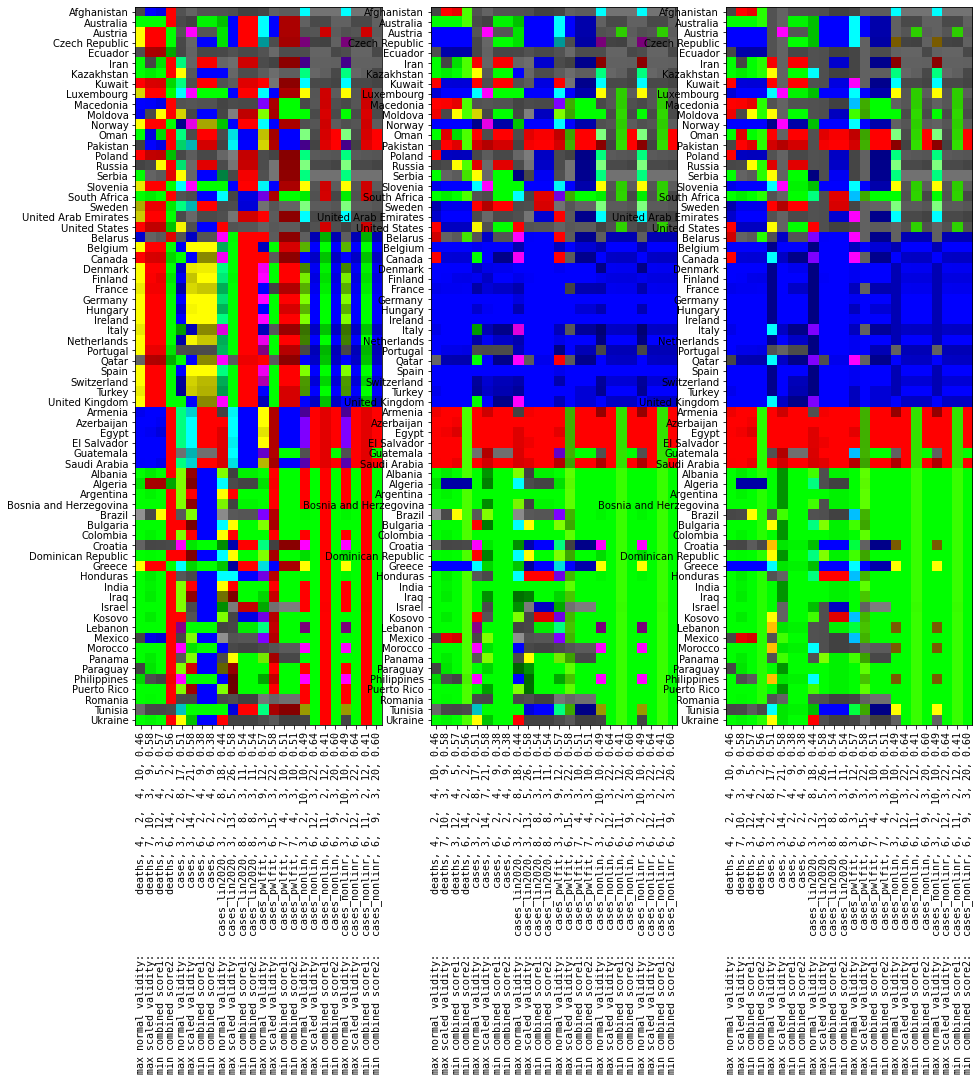

In [68]:
# the three stages of cluster alignment
fig,axes = plt.subplots(1,3,figsize=(15,20))

ax = axes[0]
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[1]
img = ax.imshow(coldata_adj)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[2]
img = ax.imshow(coldata_adj2)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

plt.show()

#### So the conclusions are: 
* the relabelling phases 1 and 2 are now working
* chosing the right reference column helps : here 7 not 0
* there is pretty good cohesion in the 3 cluster interpretation with the blue cluster confused by a lot of countries on the blue-green divide

In [69]:
set(range(10)) - set(range(5))

{5, 6, 7, 8, 9}

In [70]:
len(clusdata_s)

24

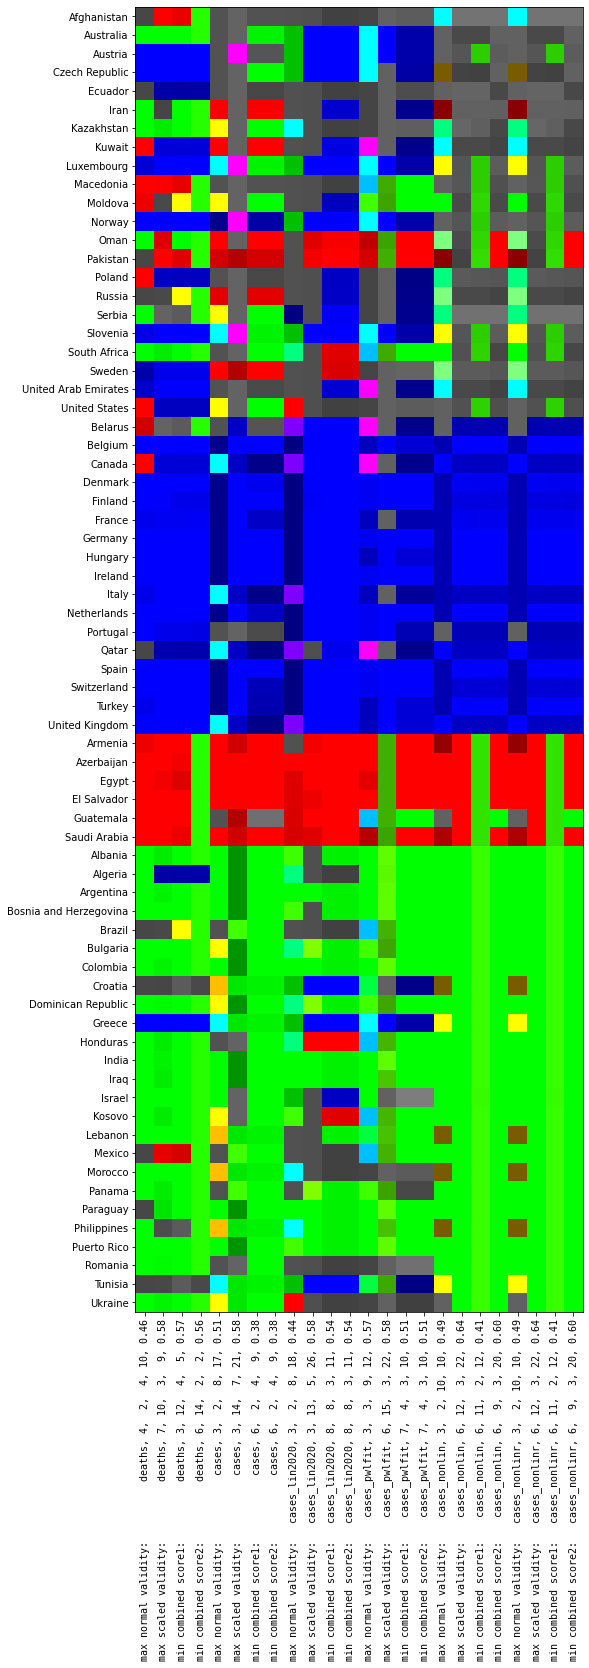

In [71]:
# the final cluster alignment
def plot_clusalign(countries,data,report,cols=None):
    fig,ax = plt.subplots(1,1,figsize=(10,24))
    if cols is not None:
        todel = list(set(range(data.shape[1])) - set(cols))
        data = np.delete(data,todel,1)
    img = ax.imshow(data)
    ax.set_yticks(range(len(countries)))
    ax.set_yticklabels(countries)
    if cols is None:
        rep = report
    else:
        rep = [report[i] for i in cols]
    ax.set_xticks(range(len(rep)))
    plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
    ax.set_xticklabels(rep,rotation='vertical')
    plt.show()

plot_clusalign(scountries,coldata_adj2,report)

In [72]:
#choose columns
cols = [i for i,x in enumerate(report) if 'deaths,' in x or 'cases,' in x or 'cases_nonlin,' in x]
cols

[0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19]

In [73]:
set(range(coldata_adj2.shape[1])) - set(cols)

{8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23}

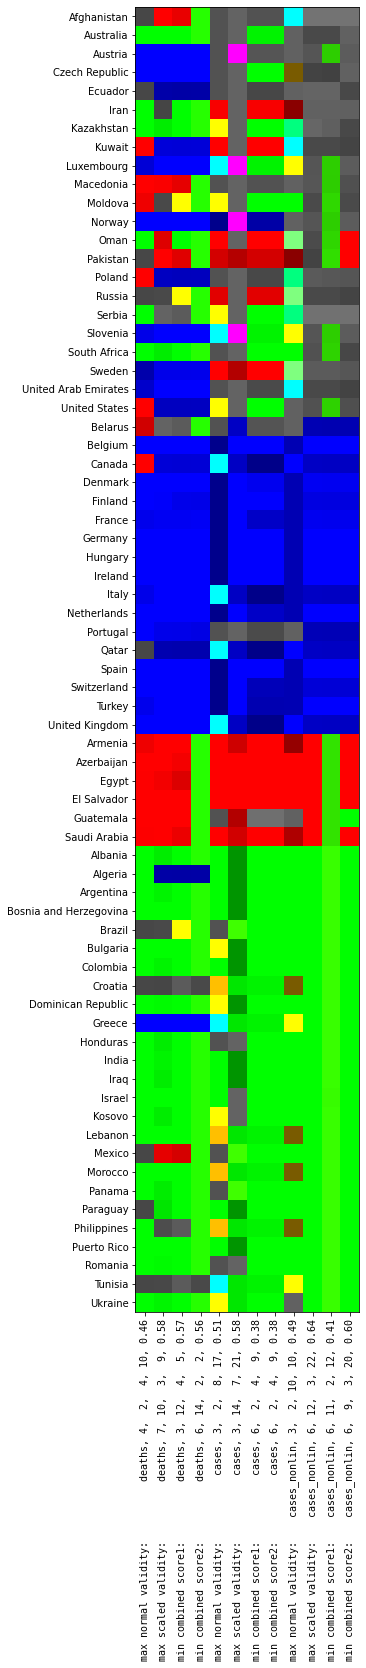

In [74]:
plot_clusalign(scountries,coldata_adj2,report,cols)

In [75]:
(len(scountries),coldata_adj2.shape)

(70, (70, 24, 3))

In [76]:
np.argmax(coldata_adj[1,1,:])

1

In [77]:
# Note that the colours are best understood as hue with value v = intensity related to membership prob
# note that unclustered points had probdata values of 0 formerly, now corrected to give outlier_score_
#
# We should be assigning countries to at least 4 categories : probably five.  Cluster 0,1,2 other cluster and no cluster (-1)
# Currently the code relies on the color assignments cluster 0 [1,0,0]  1 [0,1,0]  2 [0,0,1] and only works for 3 clusters.
# The unclustered color of [1,1,1] did not disrupt if the probability was always 0 : this will not work with outlier extension
# Other clusters higher in number were assigned rather biassedly to one of 0,1,2 : this needs fixing
# 

# count +1 for any RGB component
def cscore(crow,cols):
    rgbsc = [0.0]*3
    for j in cols:
        if crow[j][0] >0:
            rgbsc[0] = rgbsc[0]+1
        if crow[j][1] >0:
            rgbsc[1] = rgbsc[1]+1
        if crow[j][2] >0:
            rgbsc[2] = rgbsc[2]+1
    return rgbsc

# sum RGB components
def cscore_org(crow,cols):
    rgbsc = [0.0]*3
    for j in cols:
        rgbsc[0] = rgbsc[0]+crow[j][0]
        rgbsc[1] = rgbsc[1]+crow[j][1]
        rgbsc[2] = rgbsc[2]+crow[j][2]   
    return rgbsc

#sum weighted hues
def hscore_org(crow,cols):
    hsvmean = color_mean_rgb_to_hsv([crow[j] for j in cols],'all')
    return hsvmean


def swizzle(countries,data,cols):
    rgb = [None]*len(countries)
    for i in range(len(countries)):
        for j in range(data.shape[1]):
            rgbsc = cscore(data[i,:,:],cols)
        rgb[i] = np.argmax(rgbsc)
    rtn = [None]*len(countries)
    cnt = 0
    print('-------blue---------')
    for i in range(len(rgb)):
        if rgb[i] == 2:  #blue
            rtn[cnt] = i
            print(cnt,i,countries[i])
            cnt = cnt+1
    print('-------green---------')

    for i in range(len(rgb)):
        if rgb[i] == 1:  # green
            rtn[cnt] = i
            print(cnt,i,countries[i])
            cnt = cnt+1    
    print('-------red---------')
    for i in range(len(rgb)):
        if rgb[i] == 0:  # red    
            rtn[cnt] = i
            print(cnt,i,countries[i])
            cnt = cnt+1
    print('cnt =',cnt)
    return rtn

def swizzleRGB(countries,data,cols):
    rgb = [None]*len(countries)
    for i in range(len(countries)):
        for j in range(data.shape[1]):
            rgbsc = cscore(data[i,:,:],cols)
        rgb[i] = np.argmax(rgbsc)
    rtn = {}
    rtn['R']=[]
    rtn['G']=[]
    rtn['B']=[]
    cnt = 0
    for i in range(len(rgb)):
        if rgb[i] == 2:  #blue
            rtn['B'].append(countries[i])
            cnt = cnt+1
    for i in range(len(rgb)):
        if rgb[i] == 1:  # green
            rtn['G'].append(countries[i])

            cnt = cnt+1    
    for i in range(len(rgb)):
        if rgb[i] == 0:  # red    
            rtn['R'].append(countries[i])
            cnt = cnt+1
    print('cnt =',cnt)
    return rtn

def swizzle2(countries,data,cols,refcol):
    clus = [None]*len(countries)
    huesref  = np.sort(list(set([mpcolors.rgb_to_hsv(c)[0] for c in data[:,refcol]])))
    # print('huesref',huesref)
    for i in range(len(countries)):
        hsvsc = hscore_org(data[i,:,:],cols)
        hue = hsvsc[0]
        sat = hsvsc[1]
        if sat <= 0.5:  # mean is classed as unclustered
            clus[i] = -1
        else:
            clus[i] = closest_hue(hue,huesref)
    # print('clus',clus,'len',len(clus))
    rtn = [None]*len(countries)
    cnt = 0
    for j in set(clus):
        print('-------class',j,'---------')
        for i in range(len(countries)):
            if clus[i] == j:  
                rtn[cnt] = i
                print(cnt,i,countries[i])
                cnt = cnt+1
    print('cnt =',cnt)
    return rtn

def swizzleHSV(countries,data,cols,refcol):
    clus = [None]*len(countries)
    huesref  = np.sort(list(set([mpcolors.rgb_to_hsv(c)[0] for c in data[:,refcol]])))
    # print('huesref',huesref)
    for i in range(len(countries)):
        hsvsc = hscore_org(data[i,:,:],cols)
        hue = hsvsc[0]
        sat = hsvsc[1]
        if sat <= 0.5:  # mean is classed as unclustered
            clus[i] = -1
        else:
            clus[i] = closest_hue(hue,huesref)
    rtn = {}
    for cl in set(clus):
        rtn[cl]=[]
    cnt = 0
    for j in set(clus):
        print('-------class',j,'---------')
        for i in range(len(countries)):
            if clus[i] == j:
                rtn[j].append(countries[i])
                cnt = cnt+1
    print('cnt =',cnt)
    return rtn

-------class 0 ---------
0 3 Czech Republic
1 5 Iran
2 7 Kuwait
3 10 Moldova
4 12 Oman
5 13 Pakistan
6 19 Sweden
7 21 United States
8 39 Armenia
9 40 Azerbaijan
10 41 Egypt
11 42 El Salvador
12 43 Guatemala
13 44 Saudi Arabia
-------class 1 ---------
14 6 Kazakhstan
15 18 South Africa
16 45 Albania
17 46 Algeria
18 47 Argentina
19 48 Bosnia and Herzegovina
20 49 Brazil
21 50 Bulgaria
22 51 Colombia
23 52 Croatia
24 53 Dominican Republic
25 54 Greece
26 55 Honduras
27 56 India
28 57 Iraq
29 58 Israel
30 59 Kosovo
31 60 Lebanon
32 61 Mexico
33 62 Morocco
34 63 Panama
35 64 Paraguay
36 65 Philippines
37 66 Puerto Rico
38 67 Romania
39 68 Tunisia
40 69 Ukraine
-------class 2 ---------
41 8 Luxembourg
42 11 Norway
43 17 Slovenia
44 23 Belgium
45 24 Canada
46 25 Denmark
47 26 Finland
48 27 France
49 28 Germany
50 29 Hungary
51 30 Ireland
52 31 Italy
53 32 Netherlands
54 33 Portugal
55 34 Qatar
56 35 Spain
57 36 Switzerland
58 37 Turkey
59 38 United Kingdom
-------class -1 ---------
60 0 Afgh

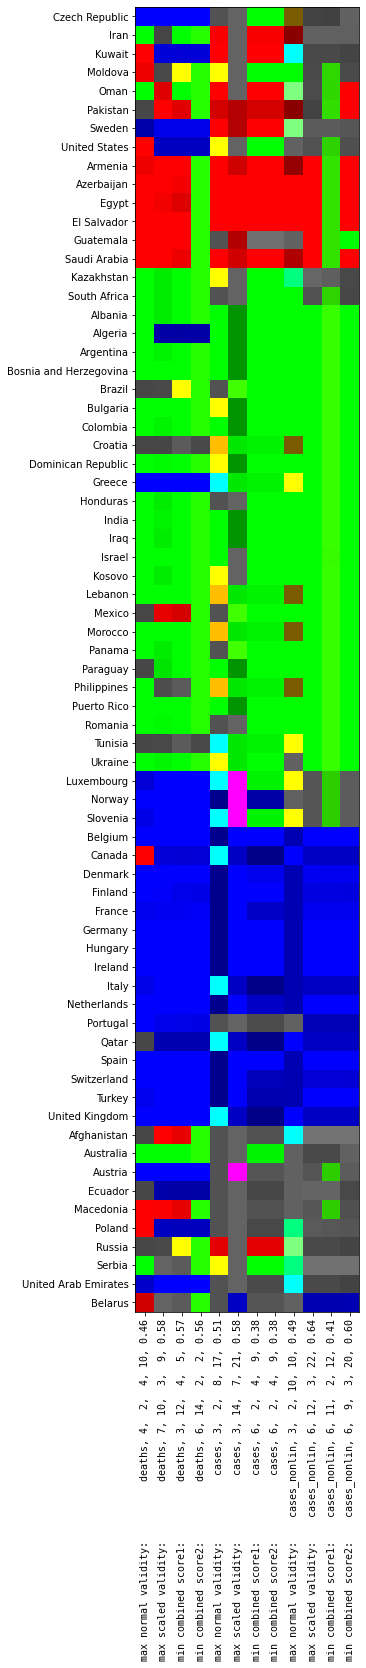

In [78]:
idx = swizzle2(scountries,coldata_adj2,cols,refclustering)
#print(cols.idx)
dat = np.array([coldata_adj2[i] for i in idx])
count = [scountries[i] for i in idx]
plot_clusalign(count,dat,report,cols)

In [79]:
foo = swizzleHSV(scountries,coldata_adj2,cols,refclustering)
with open('clusalign.pk','wb') as fp:
    pk.dump(foo,fp)

-------class 0 ---------
-------class 1 ---------
-------class 2 ---------
-------class -1 ---------
cnt = 70


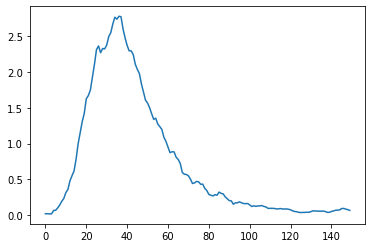

In [80]:
plt.plot(clusdata_all['deaths']['Germany']);

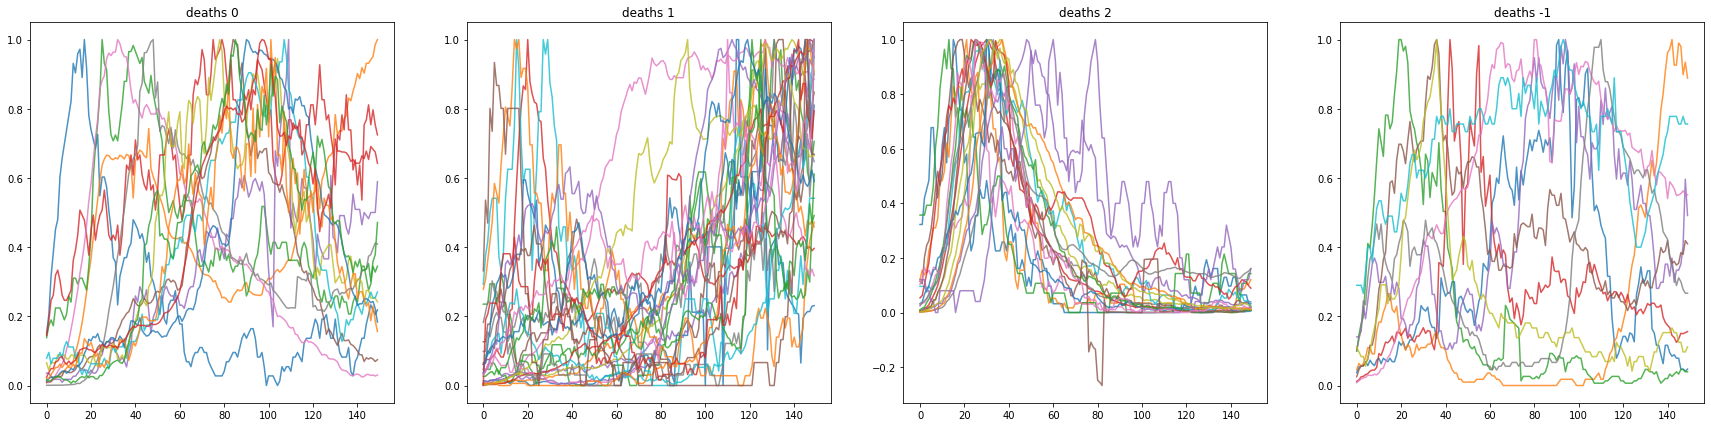

In [81]:
dtype = 'deaths'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:
    for cc in foo[label]:
        mx = max(clusdata_all[dtype][cc])
        dat = [x/mx for x in clusdata_all[dtype][cc]]
        ax[cnt].plot(dat,alpha=0.8);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1


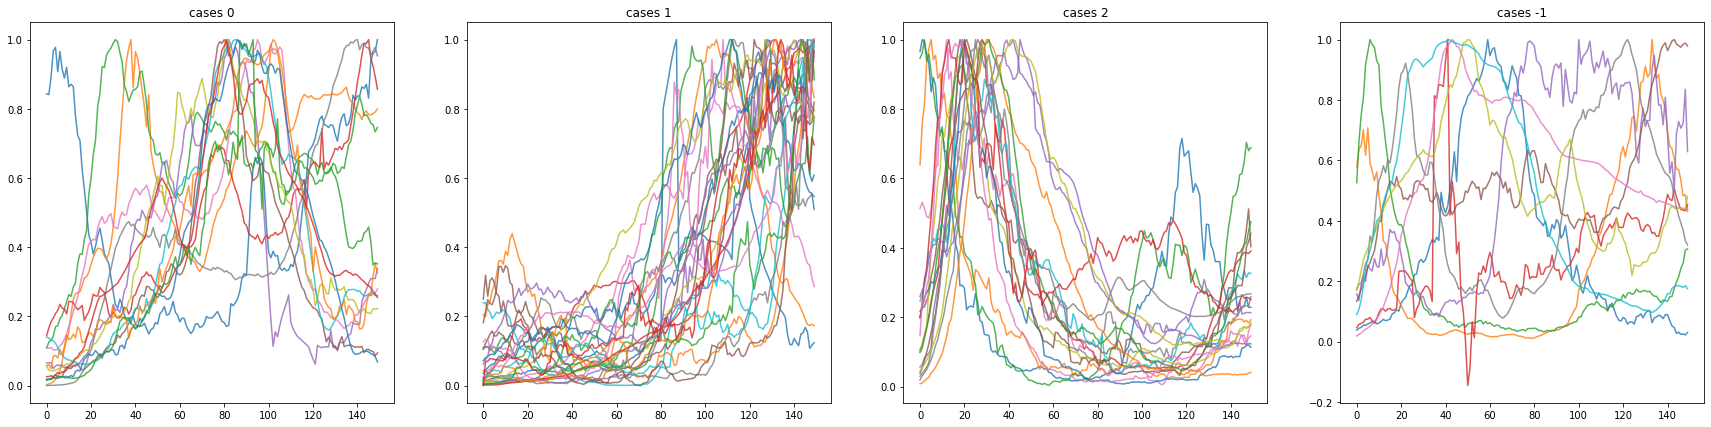

In [82]:
dtype = 'cases'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:
    for cc in foo[label]:
        mx = max(clusdata_all[dtype][cc])
        dat = [x/mx for x in clusdata_all[dtype][cc]]
        ax[cnt].plot(dat,alpha=0.8);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1



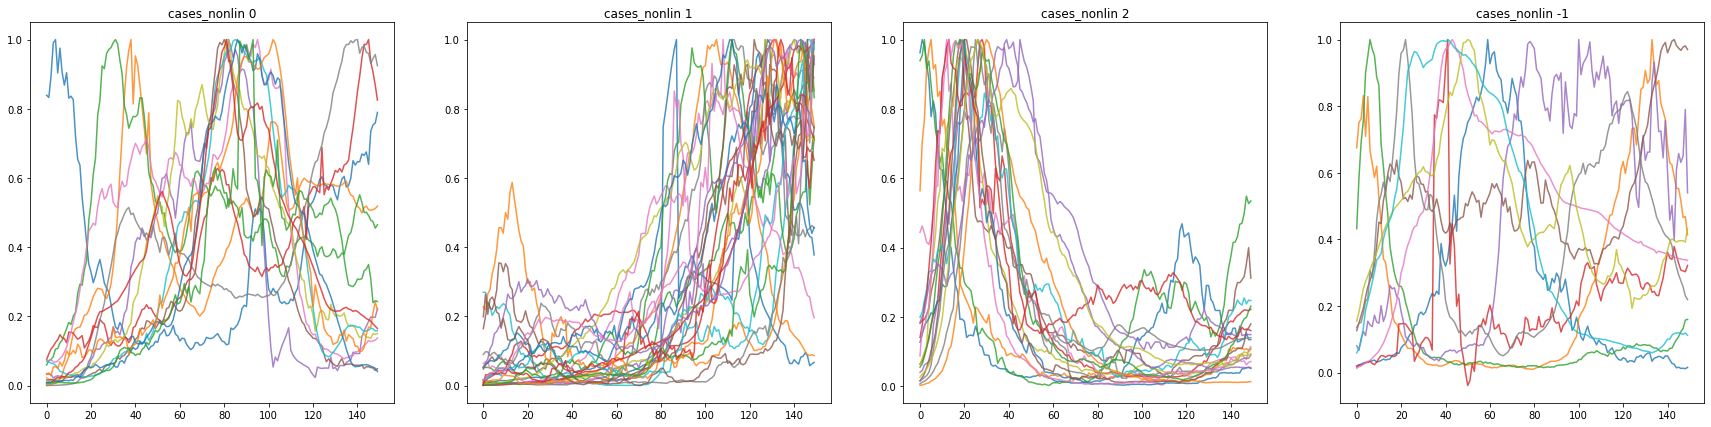

In [83]:
dtype = 'cases_nonlin'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:
    for cc in foo[label]:
        mx = max(clusdata_all[dtype][cc])
        # mx = 1
        dat = [x/mx for x in clusdata_all[dtype][cc]]
        ax[cnt].plot(dat,alpha=0.8);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1



### Conclusions

In [84]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report]

score		case	minc	dim	nclus	unclus	validitysc


['max normal validity:          deaths, 4,  2,  4, 10, 0.46',
 'max scaled validity:          deaths, 7, 10,  3,  9, 0.58',
 'min combined score1:          deaths, 3, 12,  4,  5, 0.57',
 'min combined score2:          deaths, 6, 14,  2,  2, 0.56',
 'max normal validity:           cases, 3,  2,  8, 17, 0.51',
 'max scaled validity:           cases, 3, 14,  7, 21, 0.58',
 'min combined score1:           cases, 6,  2,  4,  9, 0.38',
 'min combined score2:           cases, 6,  2,  4,  9, 0.38',
 'max normal validity:   cases_lin2020, 3,  2,  8, 18, 0.44',
 'max scaled validity:   cases_lin2020, 3, 13,  5, 26, 0.58',
 'min combined score1:   cases_lin2020, 8,  8,  3, 11, 0.54',
 'min combined score2:   cases_lin2020, 8,  8,  3, 11, 0.54',
 'max normal validity:    cases_pwlfit, 3,  3,  9, 12, 0.57',
 'max scaled validity:    cases_pwlfit, 6, 15,  3, 22, 0.58',
 'min combined score1:    cases_pwlfit, 7,  4,  3, 10, 0.51',
 'min combined score2:    cases_pwlfit, 7,  4,  3, 10, 0.51',
 'max no

In [85]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'scaled' in x]

score		case	minc	dim	nclus	unclus	validitysc


['max scaled validity:          deaths, 7, 10,  3,  9, 0.58',
 'max scaled validity:           cases, 3, 14,  7, 21, 0.58',
 'max scaled validity:   cases_lin2020, 3, 13,  5, 26, 0.58',
 'max scaled validity:    cases_pwlfit, 6, 15,  3, 22, 0.58',
 'max scaled validity:    cases_nonlin, 6, 12,  3, 22, 0.64',
 'max scaled validity:   cases_nonlinr, 6, 12,  3, 22, 0.64']

In [86]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score1' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score1:          deaths, 3, 12,  4,  5, 0.57',
 'min combined score1:           cases, 6,  2,  4,  9, 0.38',
 'min combined score1:   cases_lin2020, 8,  8,  3, 11, 0.54',
 'min combined score1:    cases_pwlfit, 7,  4,  3, 10, 0.51',
 'min combined score1:    cases_nonlin, 6, 11,  2, 12, 0.41',
 'min combined score1:   cases_nonlinr, 6, 11,  2, 12, 0.41']

In [87]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score2' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score2:          deaths, 6, 14,  2,  2, 0.56',
 'min combined score2:           cases, 6,  2,  4,  9, 0.38',
 'min combined score2:   cases_lin2020, 8,  8,  3, 11, 0.54',
 'min combined score2:    cases_pwlfit, 7,  4,  3, 10, 0.51',
 'min combined score2:    cases_nonlin, 6,  9,  3, 20, 0.60',
 'min combined score2:   cases_nonlinr, 6,  9,  3, 20, 0.60']

In [88]:
[(x,info[x]['dim'],info[x]['unclustered']) for x in cases]

KeyError: 'deaths'

In [ ]:
minscore1[0]

### Graphical analysis of an optimal clustering

In [89]:
# rerun for optimal parameters
# minscore1 : could use maxvalid or minscore1 instead
(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2) = minscore1[0][0]

food = ClusterFit(clusdata_all['cases_nonlin'])
dat = food.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
labels = clusterer.fit_predict(foo)
try:
    validity = hdbscan.validity.validity_index(foo, labels)
    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
          len(set([x for x in labels if x>-1])),'clusters;  ',
          sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
except:
    validity=None


    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
      len(set([x for x in labels if x>-1])),'clusters;  ',
      sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
#print(labels)

hdbscan_min_clus= 3 :   12 FPCAcomponents:   8 clusters;   47 clustered;   23 unclustered;  validity = 0.29134


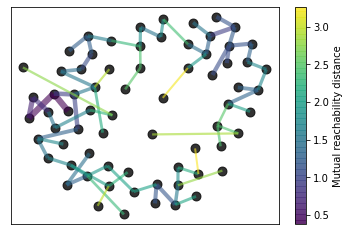

In [90]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

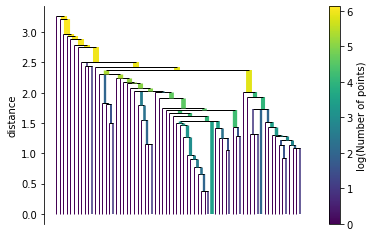

In [91]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

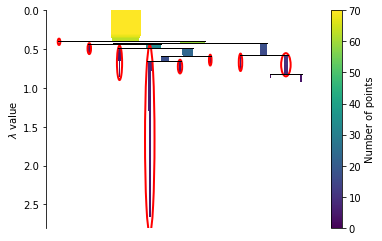

In [92]:
#clusterer.condensed_tree_.plot()
clusterer.condensed_tree_.plot(select_clusters=True)

In [93]:
from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

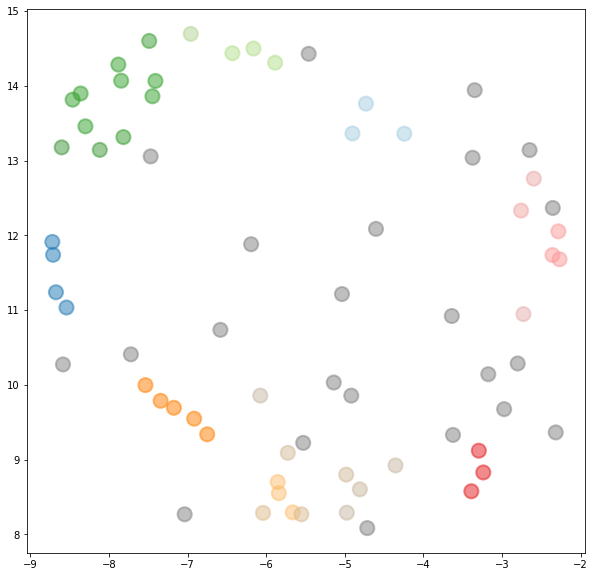

In [94]:
projection = TSNE().fit_transform(dat)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
else (0.5, 0.5, 0.5)
for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(*projection.T, s=200, linewidth=2, c=cluster_member_colors, alpha=0.5)

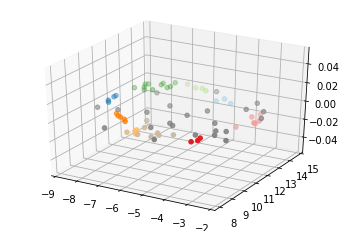

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*projection.T,c=cluster_member_colors)

In [96]:
len(countries)

70

In [97]:
len(probdata[0])

70

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Soft Clustering

In [98]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
reportdata = [None]*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
outlierdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
infomax =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
cnt=0
for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+1,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+1] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+2,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+2] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+3,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+3] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            info.loc[cnt] = [case,minc,min_samples,ncomp,nclustered,nunclustered,validity,validitysc,score1,score2]
            cnt = cnt+1

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])
    

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   44 clustered;   26 unclustered;  validity = 0.31817 validitysc = 0.31817 score1: 10.343 score2: 32.687
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   10 unclustered;  validity = 0.46493 validitysc = 0.46493 score1: 4.151 score2: 4.302
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.43505 validitysc = 0.43505 score1: 4.599 score2: 5.172
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   61 clustered;   9 unclustered;  validity = 0.4

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   69 clustered;   1 unclustered;  validity = 0.02669 validitysc = 0.06426 score1: 16.761 score2: 4.668
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   64 clustered;   6 unclustered;  validity = 0.32839 validitysc = 0.56061 score1: 2.9

hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   61 clustered;   9 unclustered;  validity = 0.38037 validitysc = 0.38037 score1: 4.429 score2: 4.732
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   49 clustered;   21 unclustered;  validity = 0.41641 validitysc = 0.50071 score1: 7.697 score2: 14.679
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   46 clustered;   24 unclustered;  validity = 0.41168 validitysc = 0.49584 score1: 7.817 

hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   63 clustered;   7 unclustered;  validity = 0.0967 validitysc = 0.2114 score1: 7.13 score2: 9.934
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   44 clustered;   26 unclustered;  validity = 0.28099 validitysc = 0.5049 score1: 8.681 score2: 18.023
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.26758 validitysc = 0.48805 score1: 8.849 score2: 17.826
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   22 unclustered;  validity = 0.20006 validitysc = 0.3949 score1: 6.932 score2: 11.142
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   62 clustered;   8 unclustered;  validity = 0.13039 validitysc = 0.28122 score1: 6.156 score2: 8.534
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   62 clustered;   8 unclustered;  validity = 0.13039 validitysc = 0.28122 score1: 6.1

hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   25 unclustered;  validity = 0.35802 validitysc = 0.4394 score1: 7.276 score2: 11.379
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   25 unclustered;  validity = 0.35802 validitysc = 0.4394 score1: 7.276 score2: 11.379
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   25 unclustered;  validity = 0.35802 validitysc = 0.4394 score1: 7.276 score2: 11.379
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   25 unclustered;  validity = 0.35802 validitysc = 0.4394 score1: 7.276 score2: 11.379
hdbscan:  9 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   25 unclustered;  validity = 0.35802 validitysc = 0.4394 score1: 7.276 score2: 11.379
--------------------------
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   46 clustered;   24 unclustered;  validity = 0.32978 validitysc = 0.45448 score1: 8.0

hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   44 clustered;   26 unclustered;  validity = 0.33836 validitysc = 0.5804 score1: 7.423 score2: 11.199
hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   24 unclustered;  validity = 0.29761 validitysc = 0.53403 score1: 6.673 score2: 8.988
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   24 unclustered;  validity = 0.29761 validitysc = 0.53403 score1: 6.673 score2: 8.988
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   24 unclustered;  validity = 0.29761 validitysc = 0.53403 score1: 6.673 score2: 8.988
hdbscan:  7 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   24 unclustered;  validity = 0.29761 validitysc = 0.53403 score1: 6.673 score2: 8.988
hdbscan:  8 minc:   2 mins:   11 FPCAcomponents:   3 clusters;   55 clustered;   15 unclustered;  validity = 0.2347 validitysc = 0.45339 score1: 5.706 score2: 8.271
hdbsc

hdbscan:  6 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   50 clustered;   20 unclustered;  validity = 0.29508 validitysc = 0.41478 score1: 7.411 score2: 14.465
hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   60 clustered;   10 unclustered;  validity = 0.37604 validitysc = 0.50505 score1: 4.48 score2: 4.95
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   60 clustered;   10 unclustered;  validity = 0.4149 validitysc = 0.54559 score1: 4.833 score2: 5.499
hdbscan:  9 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   60 clustered;   10 unclustered;  validity = 0.4149 validitysc = 0.54559 score1: 4.833 score2: 5.499
--------------------------
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   49 clustered;   21 unclustered;  validity = 0.31245 validitysc = 0.46548 score1: 7.348 score2: 13.534
hdbscan:  4 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   49 clustered;   21 unclustered;  validity = 0.31245 validitysc = 0.46548 score1: 7.348

hdbscan:  4 minc:   2 mins:   12 FPCAcomponents:   5 clusters;   43 clustered;   27 unclustered;  validity = 0.31823 validitysc = 0.5658 score1: 7.667 score2: 11.93
hdbscan:  5 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   39 clustered;   31 unclustered;  validity = 0.28942 validitysc = 0.53207 score1: 8.079 score2: 11.652
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   48 clustered;   22 unclustered;  validity = 0.31414 validitysc = 0.56116 score1: 6.682 score2: 9.801
hdbscan:  7 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   59 clustered;   11 unclustered;  validity = 0.23292 validitysc = 0.45879 score1: 5.38 score2: 7.193
hdbscan:  8 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   59 clustered;   11 unclustered;  validity = 0.23292 validitysc = 0.45879 score1: 5.38 score2: 7.193
hdbscan:  9 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   59 clustered;   11 unclustered;  validity = 0.23292 validitysc = 0.45879 score1: 5.38 score2: 7.193
-------

hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   48 clustered;   22 unclustered;  validity = 0.19627 validitysc = 0.29252 score1: 8.819 score2: 22.562
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   48 clustered;   22 unclustered;  validity = 0.19627 validitysc = 0.29252 score1: 8.819 score2: 22.562
hdbscan:  9 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   48 clustered;   22 unclustered;  validity = 0.19627 validitysc = 0.29252 score1: 8.819 score2: 22.562
--------------------------
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   52 clustered;   18 unclustered;  validity = 0.33848 validitysc = 0.49507 score1: 7.62 score2: 14.543
hdbscan:  4 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   51 clustered;   19 unclustered;  validity = 0.30693 validitysc = 0.45906 score1: 6.978 score2: 12.417
hdbscan:  5 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   47 clustered;   23 unclustered;  validity = 0.32665 validitysc = 0.48176 score1:

hdbscan:  9 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.20464 validitysc = 0.41034 score1: 5.837 score2: 8.773
--------------------------
hdbscan:  3 minc:   2 mins:   12 FPCAcomponents:   8 clusters;   47 clustered;   23 unclustered;  validity = 0.29134 validitysc = 0.53439 score1: 8.471 score2: 17.216
hdbscan:  4 minc:   2 mins:   12 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.26432 validitysc = 0.50076 score1: 8.797 score2: 17.373
hdbscan:  5 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   39 clustered;   31 unclustered;  validity = 0.2851 validitysc = 0.52682 score1: 8.098 score2: 11.769
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   48 clustered;   22 unclustered;  validity = 0.38743 validitysc = 0.63843 score1: 6.466 score2: 8.615
hdbscan:  7 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.18528 validitysc = 0.38835 sco

hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   52 clustered;   18 unclustered;  validity = 0.33848 validitysc = 0.49507 score1: 7.62 score2: 14.543
hdbscan:  4 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   51 clustered;   19 unclustered;  validity = 0.30693 validitysc = 0.45906 score1: 6.978 score2: 12.417
hdbscan:  5 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   47 clustered;   23 unclustered;  validity = 0.32665 validitysc = 0.48176 score1: 7.176 score2: 11.935
hdbscan:  6 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   47 clustered;   23 unclustered;  validity = 0.32665 validitysc = 0.48176 score1: 7.176 score2: 11.935
hdbscan:  7 minc:   2 mins:   5 FPCAcomponents:   3 clusters;   42 clustered;   28 unclustered;  validity = 0.23005 validitysc = 0.36409 score1: 8.847 score2: 19.226
hdbscan:  8 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.15445 validitysc = 0.25928 score1: 7.257 score2: 13.885
hdbsc

hdbscan:  4 minc:   2 mins:   13 FPCAcomponents:   6 clusters;   41 clustered;   29 unclustered;  validity = 0.26514 validitysc = 0.50182 score1: 8.793 score2: 17.337
hdbscan:  5 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   39 clustered;   31 unclustered;  validity = 0.28409 validitysc = 0.52558 score1: 8.103 score2: 11.796
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   3 clusters;   49 clustered;   21 unclustered;  validity = 0.30491 validitysc = 0.55049 score1: 6.517 score2: 9.537
hdbscan:  7 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.18598 validitysc = 0.38944 score1: 5.968 score2: 9.244
hdbscan:  8 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.18598 validitysc = 0.38944 score1: 5.968 score2: 9.244
hdbscan:  9 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   58 clustered;   12 unclustered;  validity = 0.18598 validitysc = 0.38944 score1: 5.968 score2: 9.244
--

In [99]:
case = 'deaths'
ncomp = 11
minc = 3
min_samples = 2
foocase = ClusterFit(clusdata_all[case])
dat = foocase.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples).fit(foo)
labels = clusterer.fit_predict(foo)

In [100]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,prediction_data=True).fit(foo)
soft = hdbscan.all_points_membership_vectors(clusterer)

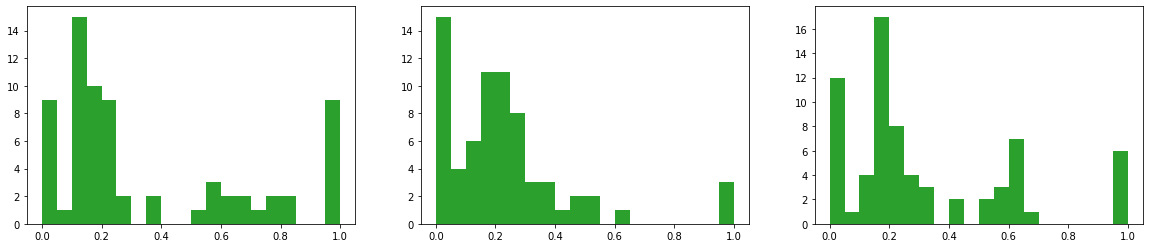

In [101]:
idx=0
fig, ax = plt.subplots(1,3,figsize=(20,4))
for idx in [0,1,2]:
    for _ in range(len(soft[0])):
        datc = [cc[idx] for cc in soft]
        ax[idx].hist(datc,bins=20)

<IPython.core.display.Javascript object>


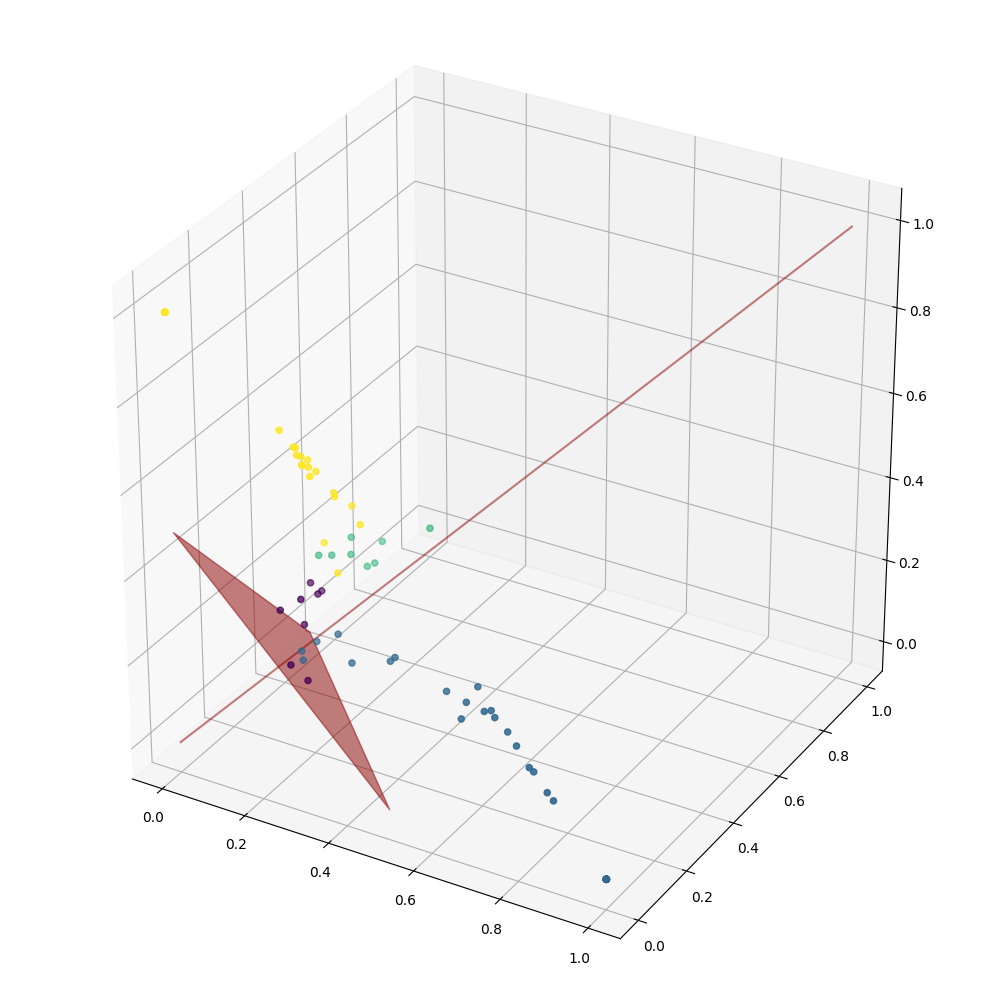

In [105]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
x=[ss[0] for ss in soft]
y = [ss[1] for ss in soft]
z = [ss[2] for ss in soft]
ax.scatter(x,y,z,c=labels)
tmp = 0.5
x = [tmp,0,0]
y = [0,tmp,0]
z = [0,0,tmp]
verts = [list(zip(x,y,z))]
tri = Poly3DCollection(verts,alpha=0.5)
tri.set_color('darkred')
ax.add_collection3d(tri)
ax.plot([0,1],[0,1],[0,1],color='darkred',alpha=0.5)
plt.show()


In [106]:
%matplotlib inline

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


## PCA clusterings

In [105]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dbhscan
datasets = [c for c in clusdata_all]
print(datasets)
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

['deaths', 'cases', 'cases_lin2020', 'cases_pwlfit', 'cases_nonlin', 'cases_nonlinr']
doing  deaths ...
found 30 clusterings with size 3 clusters
doing  cases ...
found 16 clusterings with size 3 clusters
doing  cases_lin2020 ...
found 0 clusterings with size 3 clusters
Failed to find a cluster with 3 components
doing  cases_pwlfit ...
found 34 clusterings with size 3 clusters
doing  cases_nonlin ...
found 1 clusterings with size 3 clusters
doing  cases_nonlinr ...
found 1 clusterings with size 3 clusters


In [106]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata2 = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2 = np.zeros((len(res),len(countries)),dtype=np.integer)
probdata2s = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2s = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    probdata2[i,:] = foo.clus_probs[:]
    clusdata2[i,:] = foo.clus_labels[:]
    for j in range(len(scountries)):
        probdata2s[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata2s[i,j] = foo.clus_labels[clus_argsort[j]] 

In [107]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata2s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata2s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[1+cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array
report2 = ['umap_pca: %16s' % r for r in res]

In [108]:
report2

['umap_pca:           deaths',
 'umap_pca:            cases',
 'umap_pca:    cases_lin2020',
 'umap_pca:     cases_pwlfit',
 'umap_pca:     cases_nonlin',
 'umap_pca:    cases_nonlinr']

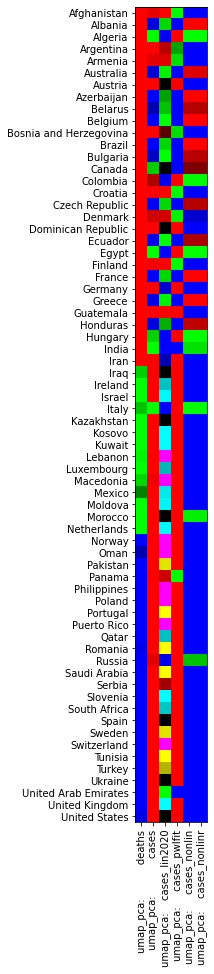

In [109]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(report2,rotation='vertical')
# fig.colorbar(img)
plt.show()

## HDBSCAN and PCA clusterings together

In [184]:
clusdata12 = np.concatenate((clusdata,clusdata2))
probdata12 = np.concatenate((probdata,probdata2))
report12 = report + report2
clus_argsort = np.lexsort((countries,clusdata12[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata12.copy()
clusdata_s = clusdata12.copy()
for i in range(len(probdata12)):
    foo = probdata12[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata12[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata12[i,clus_argsort[j]]   

In [185]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report12,rotation='vertical')
# fig.colorbar(img)
plt.show()

Mapping between clusters, so that recolor columns to best match 

In [219]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = set(clustering_a)
    labels_b = set(clustering_b)
    
    if len(labels_a) != len(colors_a): print('error wrong color list length for a')
    if len(labels_b) != len(colors_b): print('error wrong color list length for b')
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {a : colors_a[i] for i,a in enumerate(labels_a)}
    b_cols = {b : colors_b[i] for i,b in enumerate(labels_b)}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:maxlab})

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:maxlab})
    
    for b in labels_b:   # first adjust colors in b to match mapped clusters from a (transfer and merge)
        amap = [a for a in labels_a if a_to_b[a] == b]
        if len(amap) > 0:
            h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
            s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
            v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
            b_cols[b] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb

    for a in labels_a:   # now readjust colors in b that both map to same a (split)
        bmap = [b for b in labels_b if b_to_a[b] == a]
        if len(bmap)>1:
            h = sum([mpcolors.rgb_to_hsv(b_cols[b])[0] for b in bmap])/len(bmap) # average hue from bmap  
            ha = mpcolors.rgb_to_hsv(a_cols[a])[0]
            hb = np.linspace(abs(h-ha/4.),abs(h+ha/4.),len(bmap))
            #print('hb[',hb[0],hb[1],']',h,ha,ha/4.,abs(h-ha/4.),abs(h+ha/4.))
            for i,b in enumerate(bmap):
                s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                #print('s',s)
                v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                #print('v',v)
                b_cols[b]= mpcolors.hsv_to_rgb([hb[i],s,v])
                #print('hb[i],b_cols[b]',hb[i],b_cols[b])
    return b_cols,a_to_b,b_to_a

In [220]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,2,2,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1]])

({0: array([0., 1., 0.]), 1: array([1., 0., 0.]), 2: array([0., 0., 1.])},
 {0: 1, 1: 0, 2: 2},
 {0: 1, 1: 0, 2: 2})

In [221]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,3,3,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1],[1,1,0]])

({0: array([0., 1., 0.]),
  1: array([1., 0., 0.]),
  2: array([0., 1., 1.]),
  3: array([1., 0., 1.])},
 {0: 1, 1: 0, 2: 3},
 {0: 1, 1: 0, 2: 2, 3: 2})

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 

def match1(a,x):
    rtn = [1 if a[i] == x else 0 for i in range(len(a)) ]
    return rtn

## Family matching paper

References:
* [the paper](https://hal.inria.fr/hal-01514872/document)
* [the user manual](https://sbl.inria.fr/doc/D_family_matching-user-manual.html)
* [Structural Bioinformatics Library](https://sbl.inria.fr/doc/index.html) C++/python
* [jupyter notebook](https://sbl.inria.fr/demos/D_family_matching.ipynb)
